In [61]:
#설치 후 세션 다시시작
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 각 데이터 셋에 대한 컬럼 설명

🧑‍🤝‍🧑 Customers (고객 정보)

- customer_id: 고객 식별자 (주문과 연결되는 ID, unique 아님)

- customer_unique_id: 고객 고유 식별자 (실제 고객 단위 식별, unique)

- customer_zip_code_prefix: 고객 우편번호 앞자리

- customer_city: 고객 도시

- customer_state: 고객 주(state)

🌍 Geolocation (지역 좌표)

- geolocation_zip_code_prefix: 우편번호 앞자리

- geolocation_lat: 위도

- geolocation_lng: 경도

- geolocation_city: 도시명

- geolocation_state: 주(state)

📦 Order Items (주문 상품별 정보)

- order_id: 주문 ID

- order_item_id: 주문 내 상품 번호 (한 주문에 여러 상품 존재 가능)

- product_id: 상품 ID

- seller_id: 판매자 ID

- shipping_limit_date: 배송 제한 기한

- price: 상품 가격

- freight_value: 운송비

💳 Order Payments (결제 정보)

- order_id: 주문 ID

- payment_sequential: 결제 시퀀스 (여러 결제 수단 사용 시 순서)

- payment_type: 결제 방식 (credit_card, boleto 등)

- payment_installments: 할부 개월 수

- payment_value: 결제 금액

⭐ Order Reviews (리뷰 정보)

- review_id: 리뷰 ID

- order_id: 주문 ID

- review_score: 평점 (1~5점)

- review_comment_title: 리뷰 제목

- review_comment_message: 리뷰 내용

- review_creation_date: 리뷰 작성일

- review_answer_timestamp: 리뷰 답변 등록 시간

🛒 Orders (주문 정보)

- order_id: 주문 ID

- customer_id: 고객 ID

- order_status: 주문 상태 (delivered, shipped, canceled 등)

- order_purchase_timestamp: 주문 생성 시간

- order_approved_at: 결제 승인 시간

- order_delivered_carrier_date: 물류사 배송 시작일

- order_delivered_customer_date: 고객 수령일

- order_estimated_delivery_date: 예상 배송일

📑 Products (상품 정보)

- product_id: 상품 ID

- product_category_name: 상품 카테고리명 (포르투갈어)

- product_name_lenght: 상품명 길이

- product_description_lenght: 상품 설명 길이

- product_photos_qty: 상품 사진 수

- product_weight_g: 상품 무게 (g)

- product_length_cm: 상품 길이 (cm)

- product_height_cm: 상품 높이 (cm)

- product_width_cm: 상품 폭 (cm)

🏬 Sellers (판매자 정보)

- seller_id: 판매자 ID

- seller_zip_code_prefix: 판매자 우편번호 앞자리

- seller_city: 판매자 도시

- seller_state: 판매자 주(state)

🔄 Product Category Translation (상품 카테고리 번역)

- product_category_name: 상품 카테고리명 (포르투갈어)

- product_category_name_english: 상품 카테고리명 (영어 번역)

### 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

## EDA


### olist_customers_dataset

===== Customers Dataset =====
🔹 Shape: (99441, 5)

🔹 데이터 타입:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

🔹 결측치 비율:
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

🔹 customer_id 중복 개수: 0
🔹 customer_unique_id 중복 개수: 3345

🔹 기본 통계:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                          

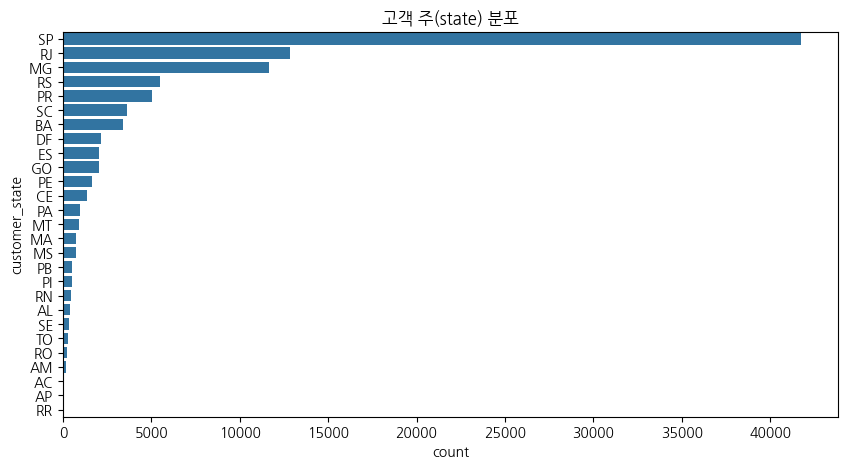

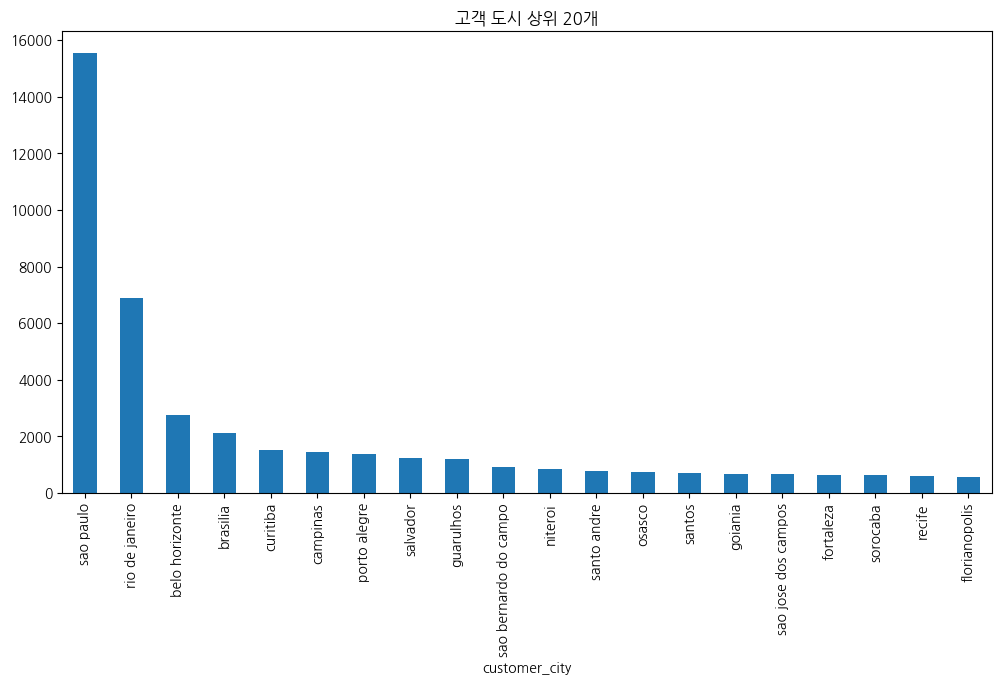

In [55]:
# 데이터 로드
customers = pd.read_csv("olist_customers_dataset.csv")

# 기본 정보
print("===== Customers Dataset =====")
print("🔹 Shape:", customers.shape)
print("\n🔹 데이터 타입:")
print(customers.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(customers.isnull().mean())

# 중복 여부 확인
print("\n🔹 customer_id 중복 개수:", customers.duplicated(subset="customer_id").sum())
print("🔹 customer_unique_id 중복 개수:", customers.duplicated(subset="customer_unique_id").sum())

# 기본 통계
print("\n🔹 기본 통계:")
print(customers.describe(include='all'))

# 고객 state 분포
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,5))
sns.countplot(y="customer_state", data=customers, order=customers["customer_state"].value_counts().index)
plt.title("고객 주(state) 분포")
plt.show()

# 고객 city 상위 20개 분포
plt.figure(figsize=(12,6))
customers["customer_city"].value_counts().head(20).plot(kind="bar")
plt.title("고객 도시 상위 20개")
plt.show()

### olist_geolocation_dataset

===== Geolocation Dataset =====
🔹 Shape: (479031, 5)

🔹 데이터 타입:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

🔹 결측치 비율:
geolocation_zip_code_prefix    0.000000
geolocation_lat                0.000000
geolocation_lng                0.000000
geolocation_city               0.000000
geolocation_state              0.000002
dtype: float64

🔹 중복 행 개수: 150169
🔹 고유 zip_code_prefix 개수: 6894

🔹 기본 통계 (위도/경도):
       geolocation_lat  geolocation_lng
count    479031.000000    479031.000000
mean        -23.117202       -46.494651
std           0.784966         1.726955
min         -29.683911       -61.932123
25%         -23.587353       -46.897803
50%         -23.485911       -46.646162
75%         -22.897275       -46.406695
max          28.008978       -15.536867


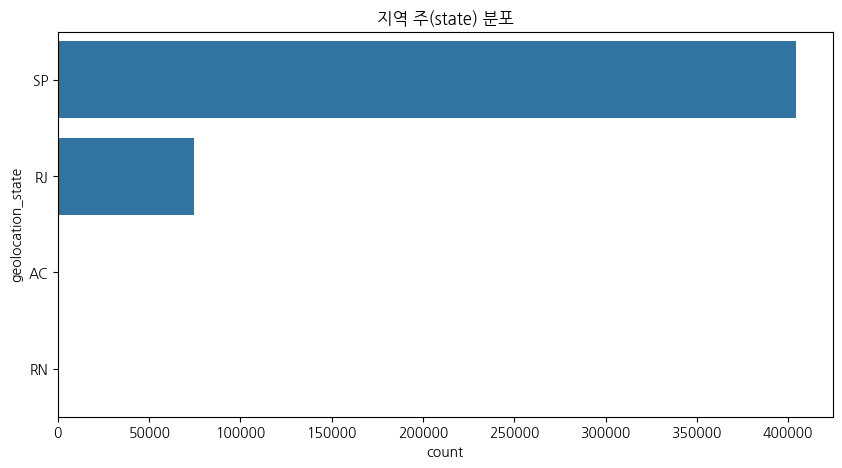

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 227 (\N{LATIN SMALL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


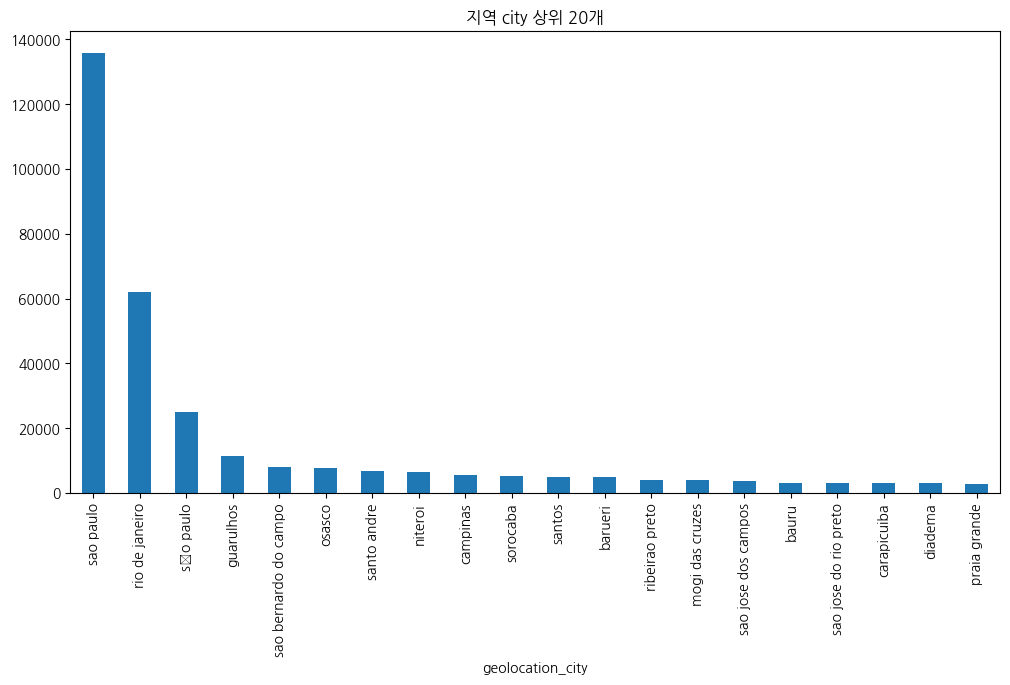

In [56]:
geolocation = pd.read_csv("olist_geolocation_dataset.csv")

# 기본 정보
print("===== Geolocation Dataset =====")
print("🔹 Shape:", geolocation.shape)
print("\n🔹 데이터 타입:")
print(geolocation.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(geolocation.isnull().mean())

# 중복 여부 확인 (zip_code_prefix 기준)
print("\n🔹 중복 행 개수:", geolocation.duplicated().sum())
print("🔹 고유 zip_code_prefix 개수:", geolocation['geolocation_zip_code_prefix'].nunique())

# 기본 통계
print("\n🔹 기본 통계 (위도/경도):")
print(geolocation[['geolocation_lat','geolocation_lng']].describe())

# 주(state) 분포
plt.figure(figsize=(10,5))
sns.countplot(y="geolocation_state", data=geolocation, order=geolocation["geolocation_state"].value_counts().index)
plt.title("지역 주(state) 분포")
plt.show()

# 도시(city) 상위 20개
plt.figure(figsize=(12,6))
geolocation["geolocation_city"].value_counts().head(20).plot(kind="bar")
plt.title("지역 city 상위 20개")
plt.show()

### olist_order_items_dataset

===== Order Items Dataset =====
🔹 Shape: (112650, 7)

🔹 데이터 타입:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

🔹 결측치 비율:
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

🔹 중복 행 개수: 0

🔹 기본 통계 (가격/운송비):
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


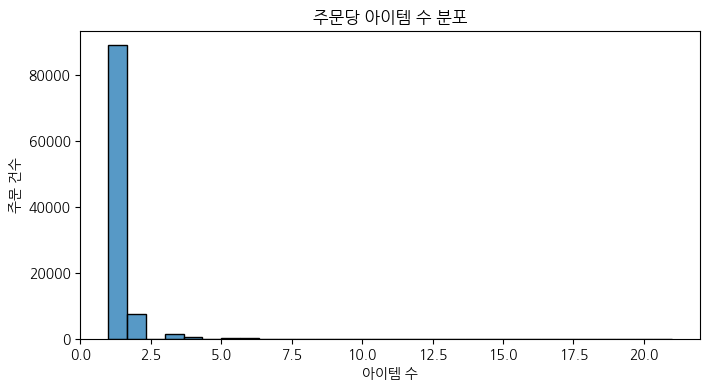

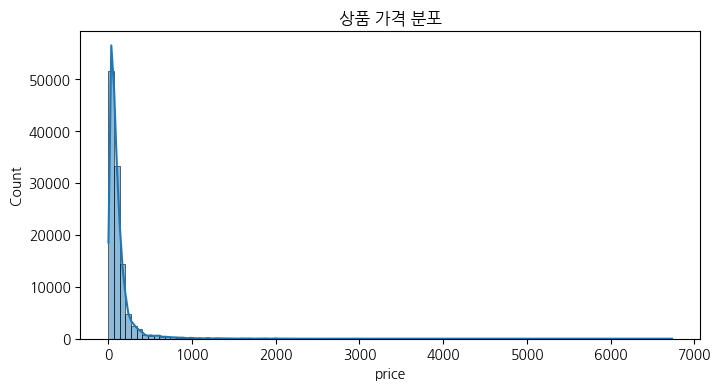

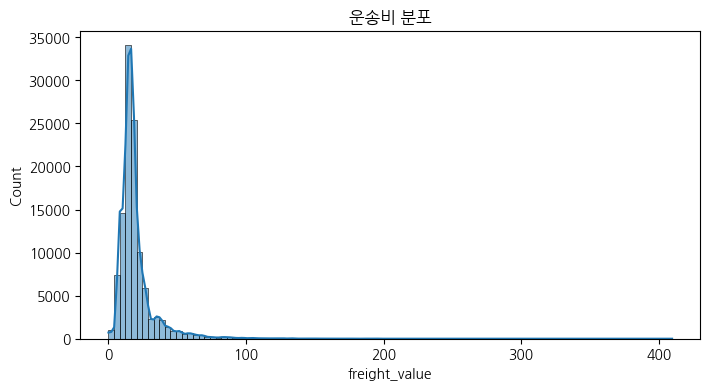

In [57]:
# 데이터 로드
order_items = pd.read_csv("olist_order_items_dataset.csv")

# 기본 정보
print("===== Order Items Dataset =====")
print("🔹 Shape:", order_items.shape)
print("\n🔹 데이터 타입:")
print(order_items.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(order_items.isnull().mean())

# 중복 여부 확인
print("\n🔹 중복 행 개수:", order_items.duplicated().sum())

# 기본 통계
print("\n🔹 기본 통계 (가격/운송비):")
print(order_items[['price','freight_value']].describe())

# 주문당 아이템 수 분포
order_count = order_items.groupby("order_id")["order_item_id"].max()
plt.figure(figsize=(8,4))
sns.histplot(order_count, bins=30, kde=False)
plt.title("주문당 아이템 수 분포")
plt.xlabel("아이템 수")
plt.ylabel("주문 건수")
plt.show()

# 상품 가격 분포
plt.figure(figsize=(8,4))
sns.histplot(order_items["price"], bins=100, kde=True)
plt.title("상품 가격 분포")
plt.show()

# 운송비 분포
plt.figure(figsize=(8,4))
sns.histplot(order_items["freight_value"], bins=100, kde=True)
plt.title("운송비 분포")
plt.show()

### olist_order_payments_dataset

===== Order Payments Dataset =====
🔹 Shape: (103886, 5)

🔹 데이터 타입:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

🔹 결측치 비율:
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

🔹 중복 행 개수: 0

🔹 기본 통계 (할부/금액):
       payment_installments  payment_value
count         103886.000000  103886.000000
mean               2.853349     154.100380
std                2.687051     217.494064
min                0.000000       0.000000
25%                1.000000      56.790000
50%                1.000000     100.000000
75%                4.000000     171.837500
max               24.000000   13664.080000


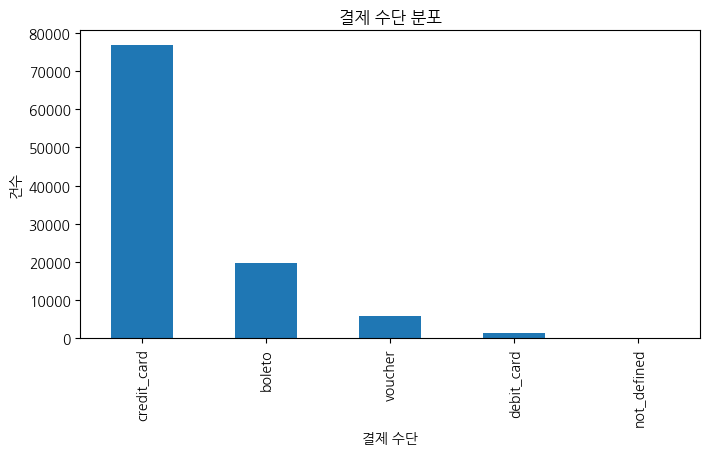

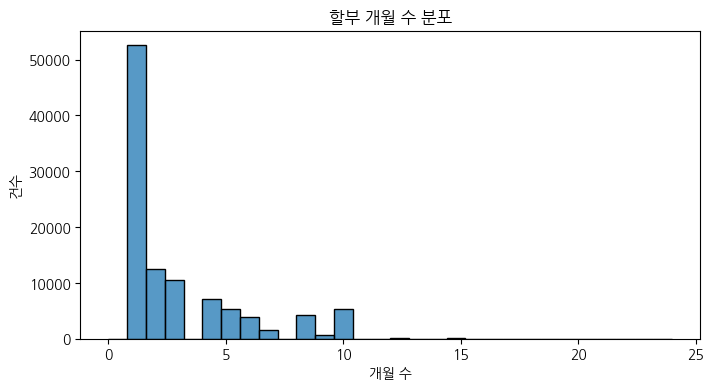

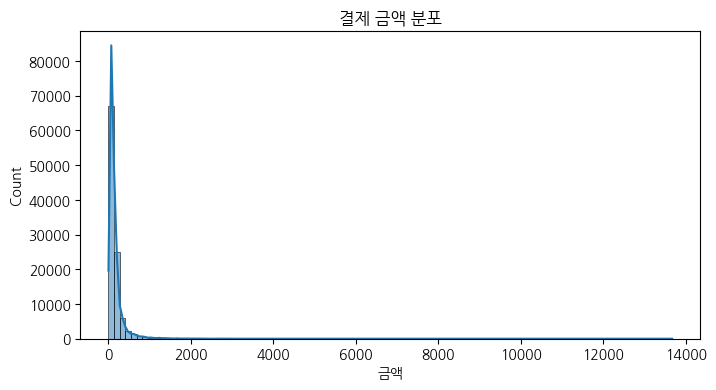

In [58]:
# 데이터 로드
order_payments = pd.read_csv("olist_order_payments_dataset.csv")

# 기본 정보
print("===== Order Payments Dataset =====")
print("🔹 Shape:", order_payments.shape)
print("\n🔹 데이터 타입:")
print(order_payments.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(order_payments.isnull().mean())

# 중복 여부 확인
print("\n🔹 중복 행 개수:", order_payments.duplicated().sum())

# 기본 통계
print("\n🔹 기본 통계 (할부/금액):")
print(order_payments[['payment_installments','payment_value']].describe())

# 결제 수단 분포
plt.figure(figsize=(8,4))
order_payments["payment_type"].value_counts().plot(kind="bar")
plt.title("결제 수단 분포")
plt.xlabel("결제 수단")
plt.ylabel("건수")
plt.show()

# 할부 개월 수 분포
plt.figure(figsize=(8,4))
sns.histplot(order_payments["payment_installments"], bins=30, kde=False)
plt.title("할부 개월 수 분포")
plt.xlabel("개월 수")
plt.ylabel("건수")
plt.show()

# 결제 금액 분포
plt.figure(figsize=(8,4))
sns.histplot(order_payments["payment_value"], bins=100, kde=True)
plt.title("결제 금액 분포")
plt.xlabel("금액")
plt.show()

### olist_order_reviews_dataset

===== Order Reviews Dataset =====
🔹 Shape: (99224, 7)

🔹 데이터 타입:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

🔹 결측치 비율:
review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

🔹 중복 행 개수: 0


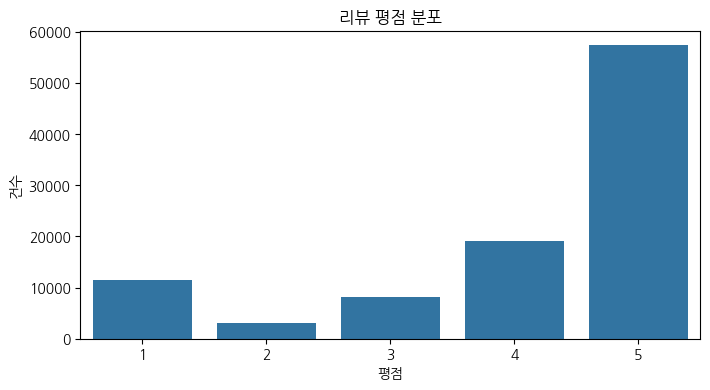

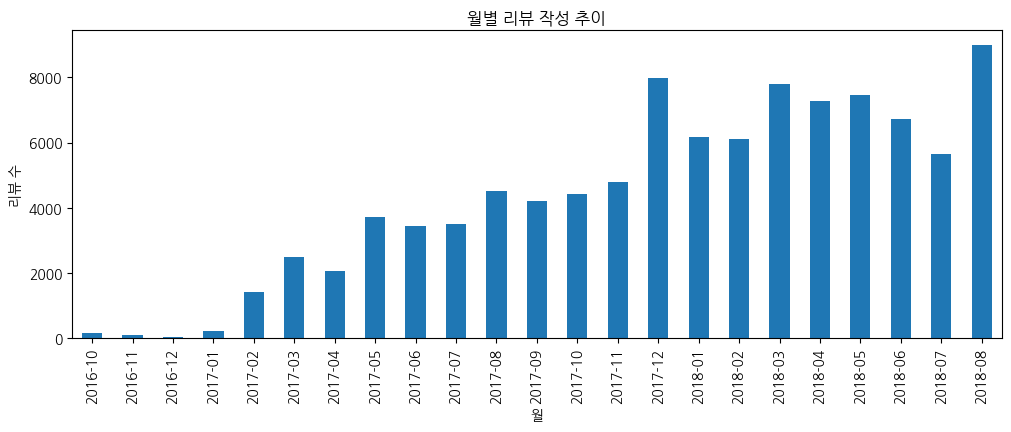

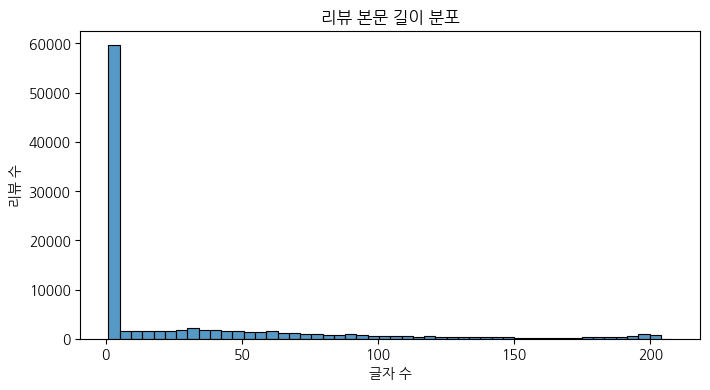

In [59]:
# 데이터 로드
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")

# 기본 정보
print("===== Order Reviews Dataset =====")
print("🔹 Shape:", order_reviews.shape)
print("\n🔹 데이터 타입:")
print(order_reviews.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(order_reviews.isnull().mean())

# 중복 여부 확인
print("\n🔹 중복 행 개수:", order_reviews.duplicated().sum())

# 리뷰 점수 분포
plt.figure(figsize=(8,4))
sns.countplot(x="review_score", data=order_reviews, order=sorted(order_reviews["review_score"].unique()))
plt.title("리뷰 평점 분포")
plt.xlabel("평점")
plt.ylabel("건수")
plt.show()

# 리뷰 작성 시점 분포
order_reviews["review_creation_date"] = pd.to_datetime(order_reviews["review_creation_date"])
plt.figure(figsize=(12,4))
order_reviews["review_creation_date"].dt.to_period("M").value_counts().sort_index().plot(kind="bar")
plt.title("월별 리뷰 작성 추이")
plt.xlabel("월")
plt.ylabel("리뷰 수")
plt.show()

# 리뷰 길이 분포 (본문 기준)
order_reviews["comment_length"] = order_reviews["review_comment_message"].astype(str).apply(len)
plt.figure(figsize=(8,4))
sns.histplot(order_reviews["comment_length"], bins=50, kde=False)
plt.title("리뷰 본문 길이 분포")
plt.xlabel("글자 수")
plt.ylabel("리뷰 수")
plt.show()

### olist_orders_dataset

===== Orders Dataset =====
🔹 Shape: (99441, 8)

🔹 데이터 타입:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

🔹 결측치 비율:
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

🔹 중복 행 개수: 0


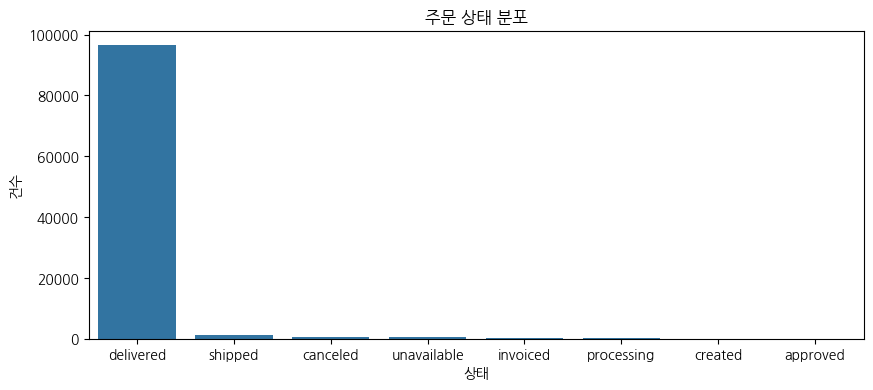

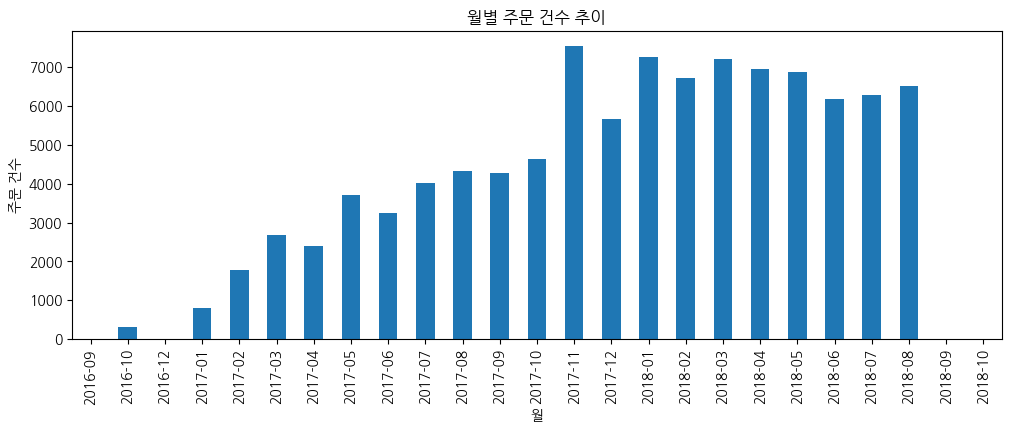

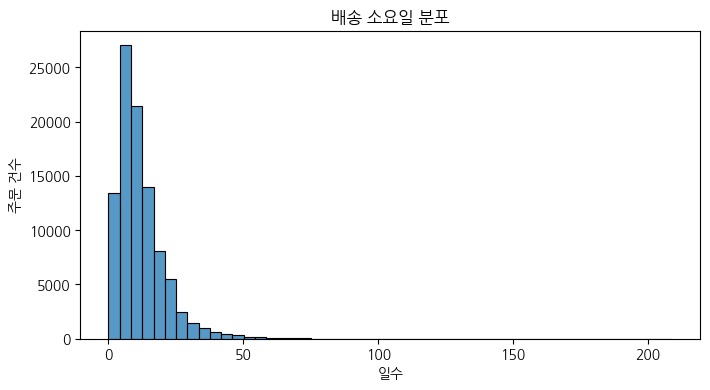

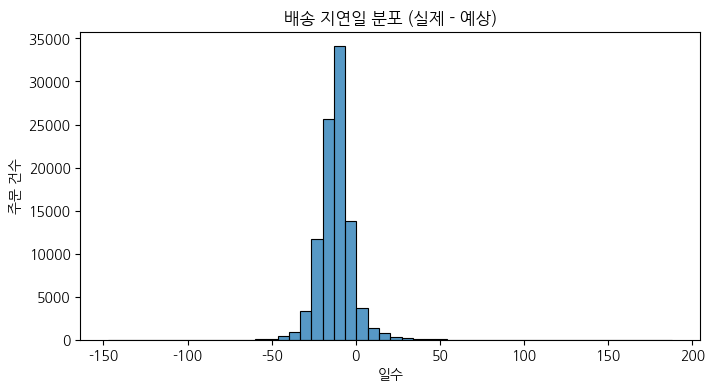

In [60]:
# 데이터 로드
orders = pd.read_csv("olist_orders_dataset.csv")

# 기본 정보
print("===== Orders Dataset =====")
print("🔹 Shape:", orders.shape)
print("\n🔹 데이터 타입:")
print(orders.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(orders.isnull().mean())

# 중복 여부 확인
print("\n🔹 중복 행 개수:", orders.duplicated().sum())

# 주문 상태 분포
plt.figure(figsize=(10,4))
sns.countplot(x="order_status", data=orders, order=orders["order_status"].value_counts().index)
plt.title("주문 상태 분포")
plt.xlabel("상태")
plt.ylabel("건수")
plt.show()

# 주문 생성일 분포
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
plt.figure(figsize=(12,4))
orders["order_purchase_timestamp"].dt.to_period("M").value_counts().sort_index().plot(kind="bar")
plt.title("월별 주문 건수 추이")
plt.xlabel("월")
plt.ylabel("주문 건수")
plt.show()

# 배송 소요일 계산
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["delivery_days"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

plt.figure(figsize=(8,4))
sns.histplot(orders["delivery_days"].dropna(), bins=50, kde=False)
plt.title("배송 소요일 분포")
plt.xlabel("일수")
plt.ylabel("주문 건수")
plt.show()

# 예상 vs 실제 배송일 차이
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])
orders["delay_days"] = (orders["order_delivered_customer_date"] - orders["order_estimated_delivery_date"]).dt.days

plt.figure(figsize=(8,4))
sns.histplot(orders["delay_days"].dropna(), bins=50, kde=False)
plt.title("배송 지연일 분포 (실제 - 예상)")
plt.xlabel("일수")
plt.ylabel("주문 건수")
plt.show()

### olist_products_dataset

===== Products Dataset =====
🔹 Shape: (32951, 9)

🔹 데이터 타입:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

🔹 결측치 비율:
product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

🔹 중복 행 개수: 0

🔹 기본 통계 (수치형 변수):
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             4

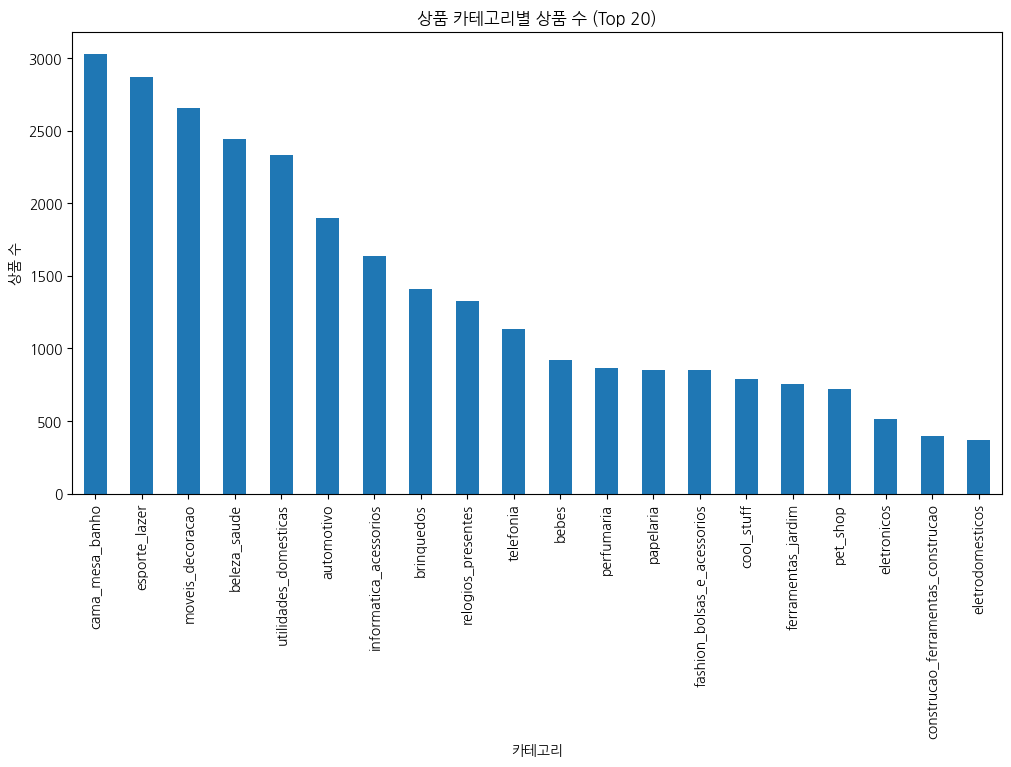

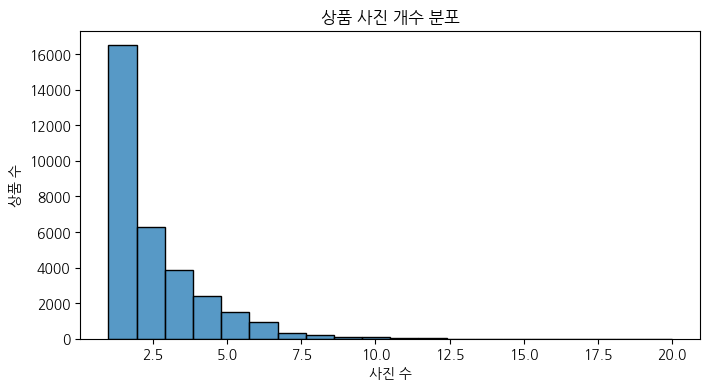

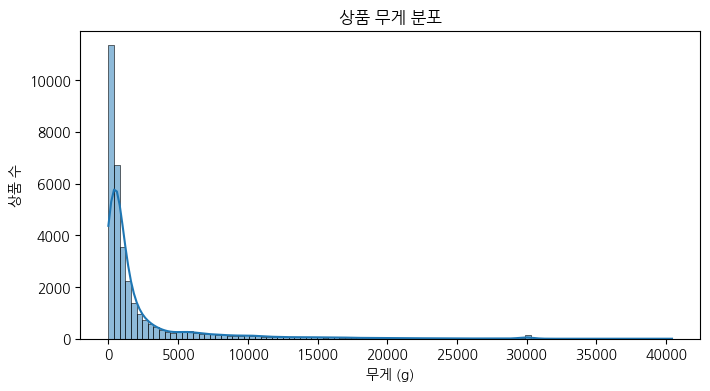

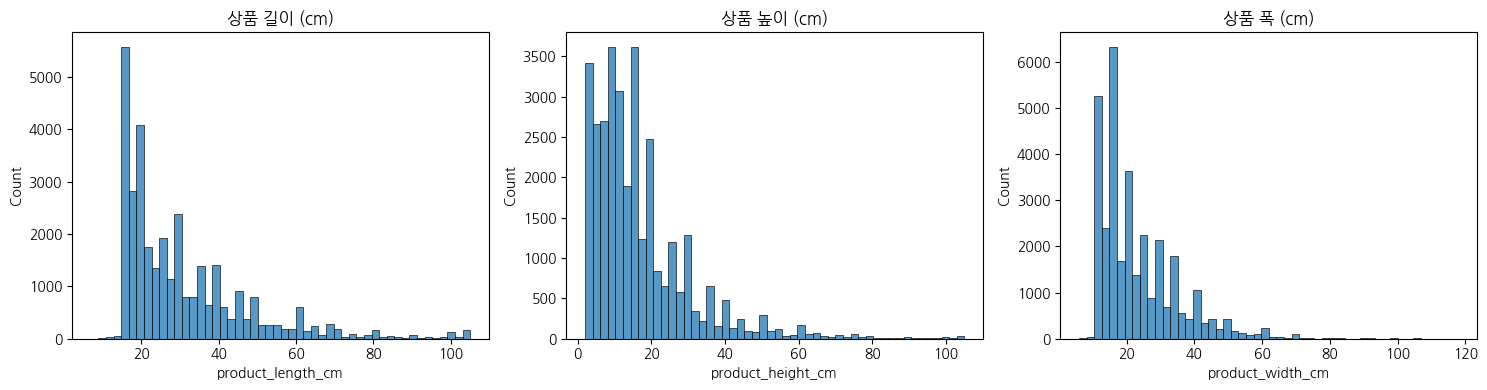

In [61]:
# 데이터 로드
products = pd.read_csv("olist_products_dataset.csv")

# 기본 정보
print("===== Products Dataset =====")
print("🔹 Shape:", products.shape)
print("\n🔹 데이터 타입:")
print(products.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(products.isnull().mean())

# 중복 여부 확인
print("\n🔹 중복 행 개수:", products.duplicated().sum())

# 기본 통계
print("\n🔹 기본 통계 (수치형 변수):")
print(products[['product_name_lenght','product_description_lenght','product_photos_qty',
                'product_weight_g','product_length_cm','product_height_cm','product_width_cm']].describe())

# 카테고리별 상품 수 (상위 20)
plt.figure(figsize=(12,6))
products["product_category_name"].value_counts().head(20).plot(kind="bar")
plt.title("상품 카테고리별 상품 수 (Top 20)")
plt.xlabel("카테고리")
plt.ylabel("상품 수")
plt.show()

# 상품 사진 개수 분포
plt.figure(figsize=(8,4))
sns.histplot(products["product_photos_qty"].dropna(), bins=20, kde=False)
plt.title("상품 사진 개수 분포")
plt.xlabel("사진 수")
plt.ylabel("상품 수")
plt.show()

# 상품 무게 분포
plt.figure(figsize=(8,4))
sns.histplot(products["product_weight_g"].dropna(), bins=100, kde=True)
plt.title("상품 무게 분포")
plt.xlabel("무게 (g)")
plt.ylabel("상품 수")
plt.show()

# 상품 크기(길이, 높이, 폭) 분포
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.histplot(products["product_length_cm"].dropna(), bins=50, ax=axes[0])
axes[0].set_title("상품 길이 (cm)")
sns.histplot(products["product_height_cm"].dropna(), bins=50, ax=axes[1])
axes[1].set_title("상품 높이 (cm)")
sns.histplot(products["product_width_cm"].dropna(), bins=50, ax=axes[2])
axes[2].set_title("상품 폭 (cm)")
plt.tight_layout()
plt.show()


### olist_sellers_dataset

===== Sellers Dataset =====
🔹 Shape: (3095, 4)

🔹 데이터 타입:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

🔹 결측치 비율:
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

🔹 중복 행 개수: 0
🔹 고유 판매자 수: 3095


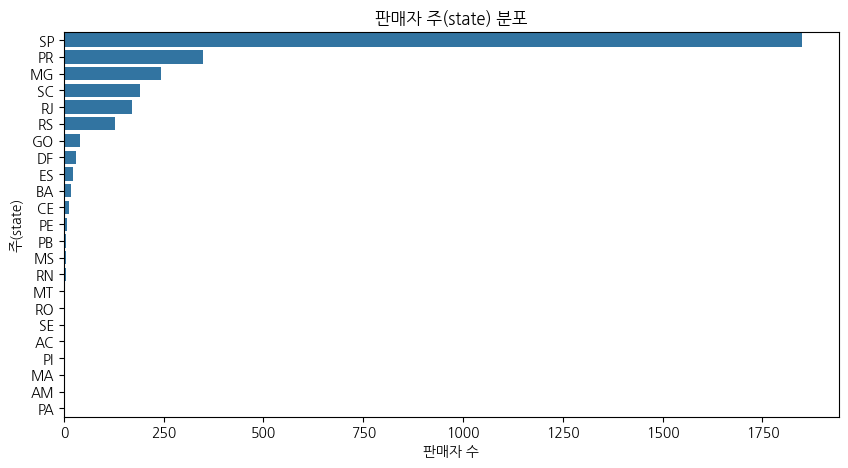

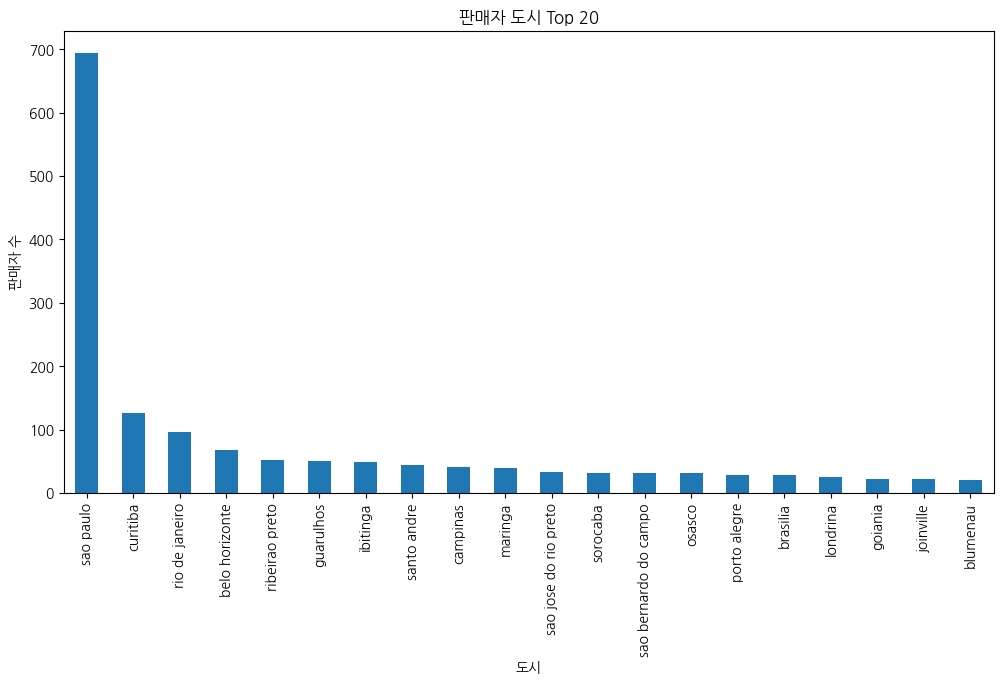

In [62]:
# 데이터 로드
sellers = pd.read_csv("olist_sellers_dataset.csv")

# 기본 정보
print("===== Sellers Dataset =====")
print("🔹 Shape:", sellers.shape)
print("\n🔹 데이터 타입:")
print(sellers.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(sellers.isnull().mean())

# 중복 여부 확인
print("\n🔹 중복 행 개수:", sellers.duplicated().sum())
print("🔹 고유 판매자 수:", sellers['seller_id'].nunique())

# 판매자 주(state) 분포
plt.figure(figsize=(10,5))
sns.countplot(y="seller_state", data=sellers, order=sellers["seller_state"].value_counts().index)
plt.title("판매자 주(state) 분포")
plt.xlabel("판매자 수")
plt.ylabel("주(state)")
plt.show()

# 판매자 도시 상위 20개
plt.figure(figsize=(12,6))
sellers["seller_city"].value_counts().head(20).plot(kind="bar")
plt.title("판매자 도시 Top 20")
plt.xlabel("도시")
plt.ylabel("판매자 수")
plt.show()


### product_category_name_translation

In [63]:
# 데이터 로드
category_translation = pd.read_csv("product_category_name_translation.csv")

# 기본 정보
print("===== Product Category Translation Dataset =====")
print("🔹 Shape:", category_translation.shape)
print("\n🔹 데이터 타입:")
print(category_translation.dtypes)

# 결측치 확인
print("\n🔹 결측치 비율:")
print(category_translation.isnull().mean())

# 중복 여부 확인
print("\n🔹 중복 행 개수:", category_translation.duplicated().sum())

# 포르투갈어 ↔ 영어 매핑 확인 (상위 10개)
print("\n🔹 포르투갈어 ↔ 영어 카테고리 매핑 (상위 10개):")
print(category_translation.head(10))

# 매핑 고유값 개수
print("\n🔹 고유 카테고리 수 (포르투갈어):", category_translation['product_category_name'].nunique())
print("🔹 고유 카테고리 수 (영어):", category_translation['product_category_name_english'].nunique())

===== Product Category Translation Dataset =====
🔹 Shape: (71, 2)

🔹 데이터 타입:
product_category_name            object
product_category_name_english    object
dtype: object

🔹 결측치 비율:
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

🔹 중복 행 개수: 0

🔹 포르투갈어 ↔ 영어 카테고리 매핑 (상위 10개):
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
5           esporte_lazer                sports_leisure
6              perfumaria                     perfumery
7   utilidades_domesticas                    housewares
8               telefonia                     telephony
9      relogios_presentes                 watches_gifts

🔹 고유 카테고리 수 (포르투갈어): 71
🔹 고유 카테고리 수 (영어): 71


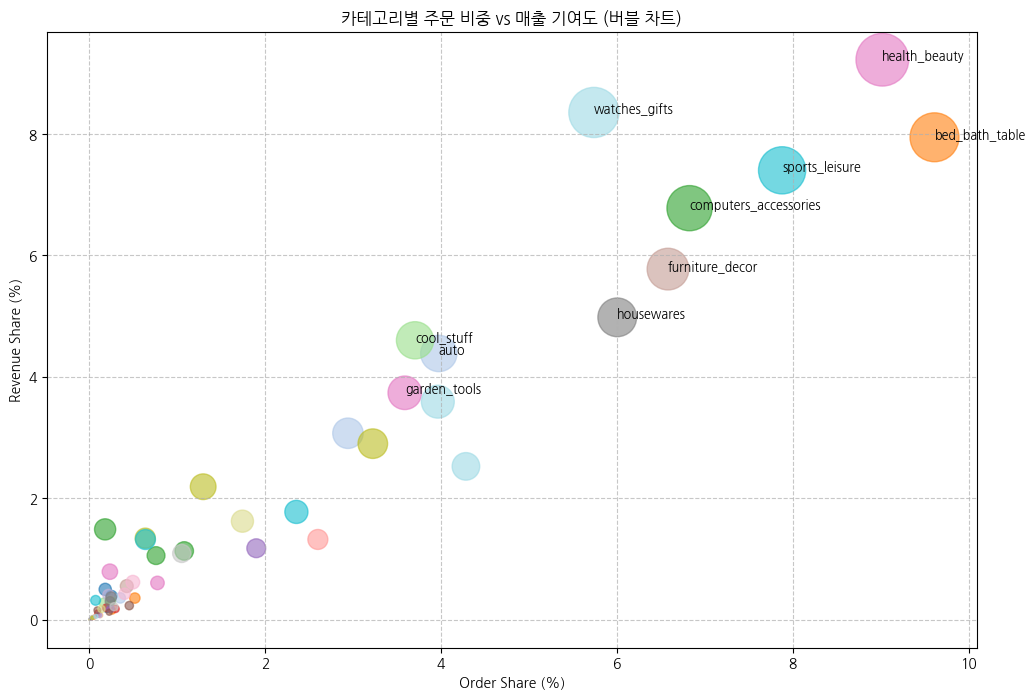

In [64]:
# 데이터 로드
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

# 조인: order_items ↔ products ↔ translation
df = order_items.merge(products, on="product_id", how="left")
df = df.merge(category_translation, on="product_category_name", how="left")

# 카테고리별 집계
category_stats = df.groupby("product_category_name_english").agg(
    order_count=("order_id", "nunique"),          # 주문 건수
    total_sales=("price", "sum"),                 # 매출 (상품 가격 합계)
    total_freight=("freight_value", "sum")        # 운송비
).reset_index()

# 운송비 포함 매출
category_stats["total_revenue"] = category_stats["total_sales"] + category_stats["total_freight"]

# 전체 대비 비중
category_stats["order_share"] = category_stats["order_count"] / category_stats["order_count"].sum() * 100
category_stats["revenue_share"] = category_stats["total_revenue"] / category_stats["total_revenue"].sum() * 100

# 버블 차트
plt.figure(figsize=(12,8))
scatter = plt.scatter(
    category_stats["order_share"],
    category_stats["revenue_share"],
    s=category_stats["total_revenue"] / 1000,   # 버블 크기 (스케일 조정 필요)
    alpha=0.6,
    c=range(len(category_stats)), cmap="tab20"
)


# 라벨 표시 (상위 몇 개만)
for i, row in category_stats.sort_values("total_revenue", ascending=False).head(10).iterrows():
    plt.text(row["order_share"], row["revenue_share"], row["product_category_name_english"], fontsize=9)

plt.xlabel("Order Share (%)")
plt.ylabel("Revenue Share (%)")
plt.title("카테고리별 주문 비중 vs 매출 기여도 (버블 차트)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

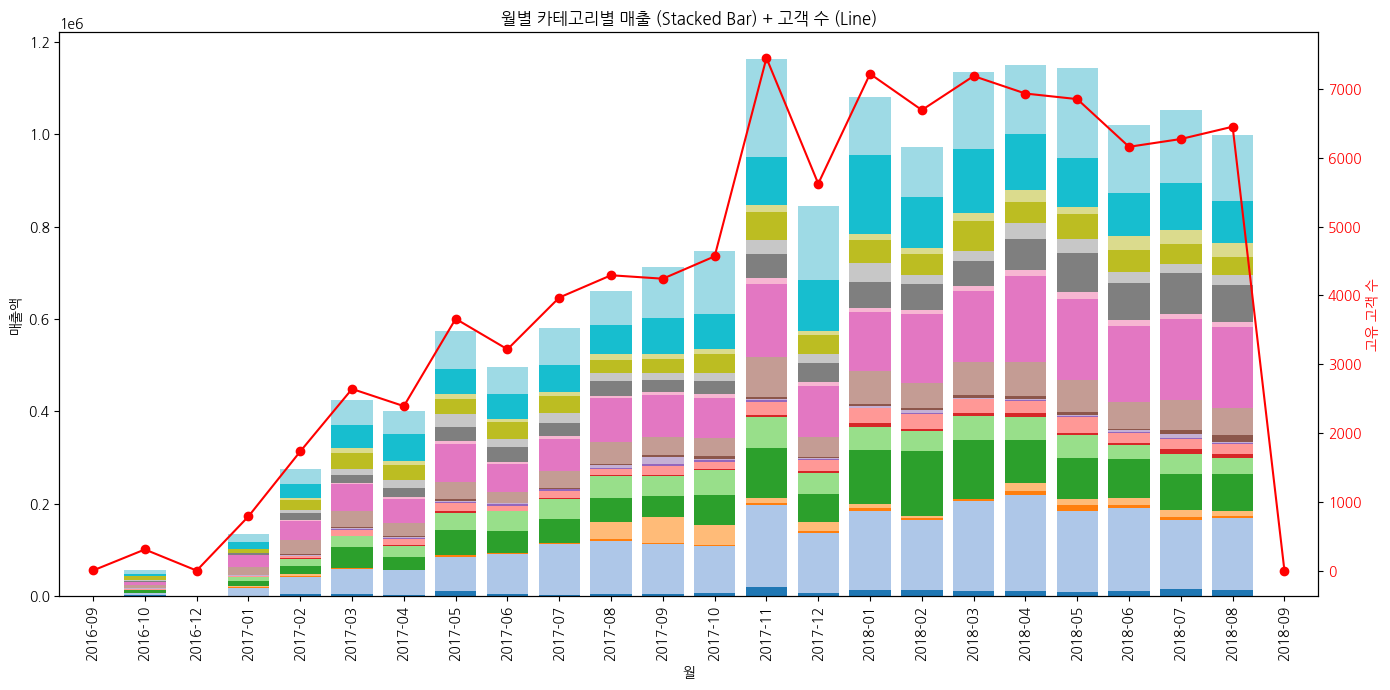

In [65]:
# 데이터 로드
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

# 날짜 변환
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period("M")

# 주문-상품-카테고리 조인
df = order_items.merge(orders[["order_id","order_month","customer_id"]], on="order_id", how="left")
df = df.merge(products[["product_id","product_category_name"]], on="product_id", how="left")
df = df.merge(category_translation, on="product_category_name", how="left")

# 매출 (price + freight_value)
df["revenue"] = df["price"] + df["freight_value"]

# 월별·카테고리별 매출 합계
monthly_category_sales = df.groupby(["order_month","product_category_name_english"])["revenue"].sum().unstack(fill_value=0)

# 월별 고유 고객 수
monthly_customers = df.groupby("order_month")["customer_id"].nunique()

# -------------------------------
# 시각화
# -------------------------------
fig, ax1 = plt.subplots(figsize=(14,7))

# 누적 막대 (카테고리별 매출)
monthly_category_sales.plot(kind="bar", stacked=True, ax=ax1, width=0.8, colormap="tab20", legend=False)
ax1.set_ylabel("매출액")
ax1.set_xlabel("월")
ax1.set_title("월별 카테고리별 매출 (Stacked Bar) + 고객 수 (Line)")

# 고객 수 (Line Chart, 오른쪽 축)
ax2 = ax1.twinx()
ax2.plot(monthly_customers.index.astype(str), monthly_customers.values,
         color="red", marker="o", label="Unique Customers")
ax2.set_ylabel("고유 고객 수", color="red")
ax2.tick_params(axis="y", labelcolor="red")

fig.tight_layout()
plt.show()

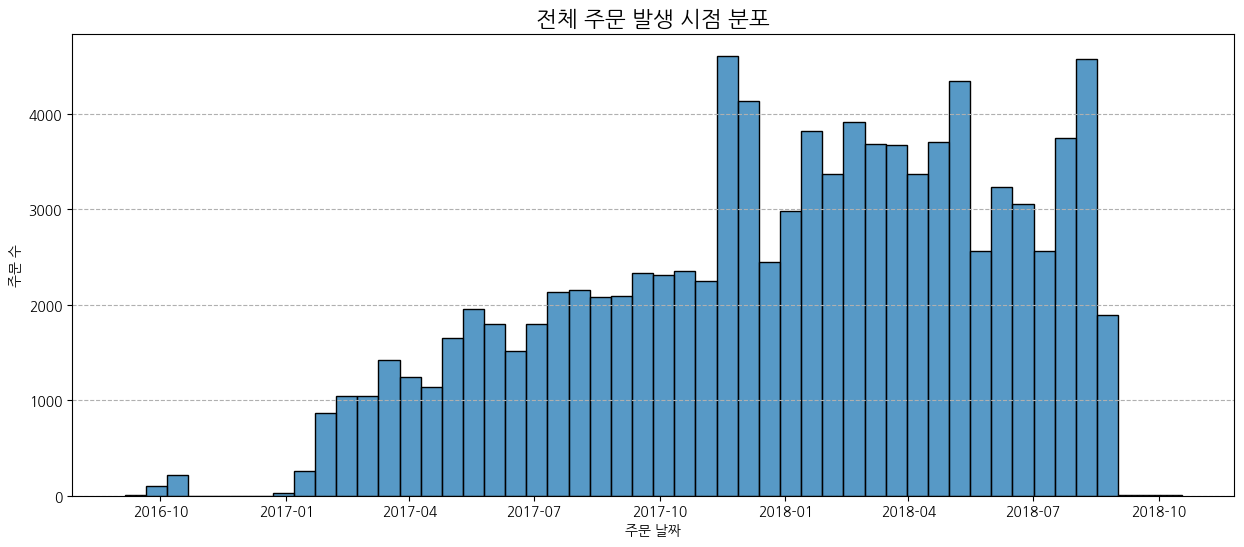

In [66]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# --- 시각화 ---
plt.figure(figsize=(15, 6))
sns.histplot(data=orders, x='order_purchase_timestamp', bins=50)
plt.title('전체 주문 발생 시점 분포', fontsize=16)
plt.xlabel('주문 날짜')
plt.ylabel('주문 수')
plt.grid(axis='y', linestyle='--')
plt.show()

--- df_cleaned 생성 완료 ---
Data shape: (111023, 6)
                           order_id                customer_unique_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1  53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
2  47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
3  949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4  ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   

  order_purchase_timestamp                        product_id  \
0      2017-10-02 10:56:33  87285b34884572647811a353c7ac498a   
1      2018-07-24 20:41:37  595fac2a385ac33a80bd5114aec74eb8   
2      2018-08-08 08:38:49  aa4383b373c6aca5d8797843e5594415   
3      2017-11-18 19:28:06  d0b61bfb1de832b15ba9d266ca96e5b0   
4      2018-02-13 21:18:39  65266b2da20d04dbe00c5c2d3bb7859e   

  product_category_name_english   price  
0                    housewares   29.99  
1                     perfumery  118.70  
2

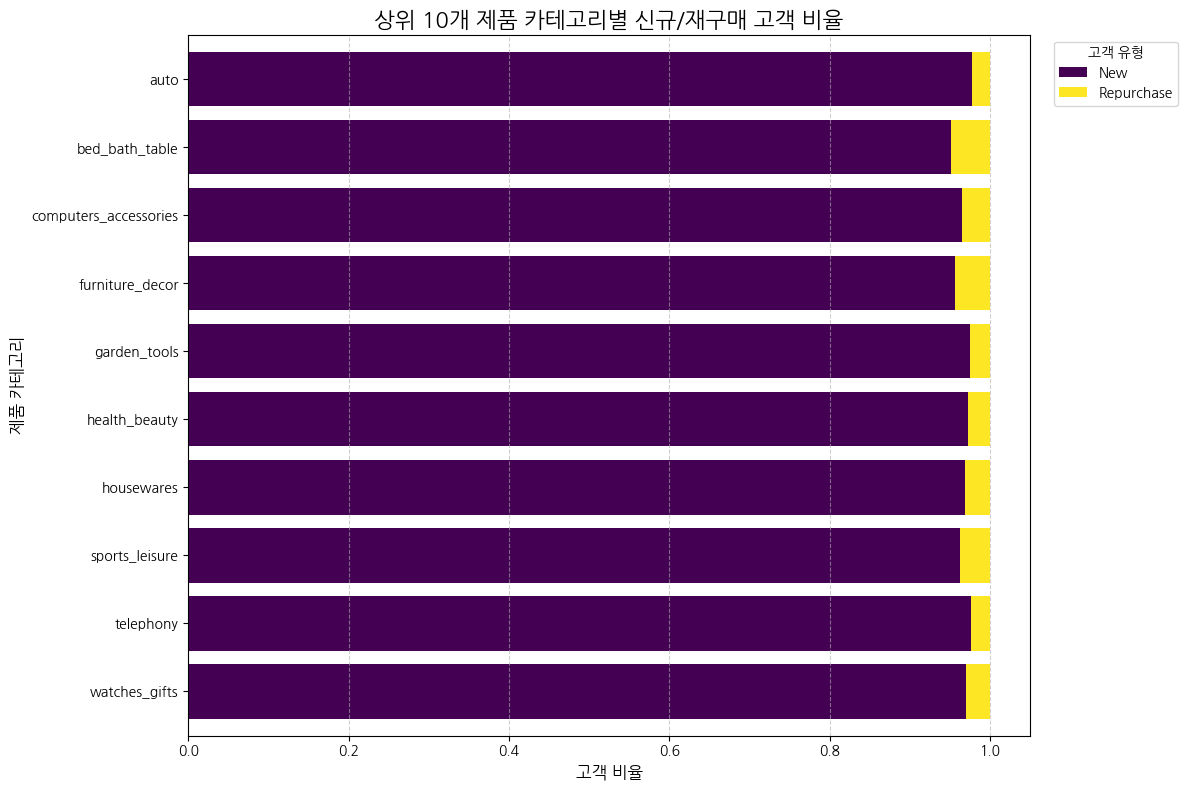

In [67]:
# 1. 데이터 로드
try:
    customers = pd.read_csv('olist_customers_dataset.csv')
    order_items = pd.read_csv('olist_order_items_dataset.csv')
    orders = pd.read_csv('olist_orders_dataset.csv')
    products = pd.read_csv('olist_products_dataset.csv')
    product_translation = pd.read_csv('product_category_name_translation.csv')
except FileNotFoundError:
    print("오류: 데이터 파일을 찾을 수 없습니다. 모든 CSV 파일이 코드와 동일한 폴더에 있는지 확인하세요.")
    # 파일이 없을 경우 코드 실행 중단
    exit()

# 2. 데이터 병합 및 정제 (`df_cleaned` 생성)
# 필요한 데이터셋들을 순차적으로 병합합니다.
df = orders.merge(order_items, on='order_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(customers, on='customer_id', how='left')
df = df.merge(product_translation, on='product_category_name', how='left')

# 날짜 데이터를 datetime 형식으로 변환합니다.
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# 분석에 사용할 핵심 컬럼들을 선택합니다.
cols = [
    'order_id', 'customer_unique_id', 'order_purchase_timestamp',
    'product_id', 'product_category_name_english', 'price'
]
# 선택한 컬럼들에서 하나라도 결측치가 있는 행은 제거하여 df_cleaned를 생성합니다.
df_cleaned = df[cols].dropna()

print("--- df_cleaned 생성 완료 ---")
print("Data shape:", df_cleaned.shape)
print(df_cleaned.head())
print("\n--- 2번 가설 분석 시작 ---")


# 3. 신규/재구매 고객 구분
# 각 고객(customer_unique_id)의 첫 구매일을 찾아서 새로운 컬럼으로 추가합니다.
df_cleaned['first_purchase_date'] = df_cleaned.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')

# 주문일과 첫 구매일이 같으면 'New', 다르면 'Repurchase'으로 고객 유형을 구분합니다.
df_cleaned['customer_type'] = np.where(df_cleaned['order_purchase_timestamp'] == df_cleaned['first_purchase_date'], 'New', 'Repurchase')


# 4. 카테고리별 고객 유형 집계 및 시각화
# 판매량이 많은 상위 10개 카테고리를 선정합니다.
top_10_categories = df_cleaned['product_category_name_english'].value_counts().nlargest(10).index

# 상위 10개 카테고리 데이터만 필터링합니다.
df_top10 = df_cleaned[df_cleaned['product_category_name_english'].isin(top_10_categories)]

# 카테고리별, 고객 유형별 주문 수를 집계합니다.
category_customer_counts = df_top10.groupby(['product_category_name_english', 'customer_type']).size().unstack(fill_value=0)

# 각 카테고리 내에서 신규/재구매 비율을 계산합니다.
category_customer_ratio = category_customer_counts.div(category_customer_counts.sum(axis=1), axis=0)

# 시각화
category_customer_ratio.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='viridis',
    width=0.8
)

plt.title('상위 10개 제품 카테고리별 신규/재구매 고객 비율', fontsize=16)
plt.xlabel('고객 비율', fontsize=12)
plt.ylabel('제품 카테고리', fontsize=12)
plt.legend(title='고객 유형', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis() # 판매량이 많은 순으로 정렬
plt.tight_layout() # 레이아웃 최적화
plt.show()

## 문제 정의

0. 문제 배경

- 제품이 어떠한 방식으로 고객을 끌어들이는지 판단하기 위해서 카테고리를 주로 하여 분석을 진행하고자 하였다.


1. 현황 및 문제점 (As-Is)

- 전통적인 고객 분석 모델(RFM)의 한계: 일반적으로 고객 세분화에 널리 사용되는 RFM(Recency, Frequency, Monetary) 모델은 제품(Product) 분석에 직접 적용하기 어렵다.

- '최근성(Recency)' 지표의 비유효성: 그래프에서 확인했듯이, 분석 대상 데이터의 주문 발생은 특정 기간(2017-2018년)에 집중되어 있다. 이는 대부분 제품의 '마지막 판매 시점'을 비슷해, 제품 간의 특성을 비교하는 변수로서 '최근성'을 무의미하게 만든다.

2. 새로운 분석 방향 및 기회 (To-Be)

- '고객 유형' 지표의 발견: 그래프를 통해, 제품 카테고리별로 신규 고객과 재구매 고객의 구매 비율에 유의미한 차이가 있음을 발견했다. 예를 들어, bed_bath_table 카테고리는 다른 카테고리에 비해 상대적으로 재구매 고객의 비중이 높게 나타난다. 비록 절대다수가 신규 고객이라 할지라도, 이러한 '상대적 차이'는 제품의 숨겨진 특성(예: 생필품 vs. 내구재)을 파악할 핵심 단서가 된다.

- 제품 중심의 새로운 분석 모델 제안: 따라서, 제품의 판매 특성을 효과적으로 그룹화하기 위해 기존 RFM 모델을 다음과 같이 수정 및 재정의한다.

  - Recency (최근성) → Repurchase_Ratio(재구매 고객 비율): 재품별 판매를 재구매 고객의 비율로 분석한다.

  - Frequency (빈도) 및 Monetary (매출) 지표는 그대로 활용하여 제품의 양적 가치를 측정한다.

3. 최종 목표
- 본 프로젝트는 전통적인 RFM 모델의 한계를 극복하고, '재구매 고객 비율(Repurchase_Ratio)'이라는 새로운 축을 도입한 RFM 모델을 통해 제품을 세분화(Clustering)하고자 한다. 이를 통해 각 제품 그룹의 특성(신규 고객 유입형, 충성 고객 유지형, 고매출 상품 등)을 명확히 정의하고, 제품별 맞춤 마케팅 및 재고 관리 전략 수립의 기반을 마련하는 것을 목표로 한다.

## 전처리

In [68]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

# delivered만 필터링
orders = orders[orders["order_status"] == "delivered"]

orders = orders[["order_id", "customer_id", "order_status", "order_purchase_timestamp", "order_delivered_customer_date"]]

In [69]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-16 13:08:30


In [70]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [71]:
customers = customers[["customer_id", "customer_unique_id", "customer_city", "customer_state"]]

customers.tail()

,customer_id,customer_unique_id,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,cotia,SP


In [72]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [73]:
# 운송비 포함 여부 결정 (price + freight_value)
order_items["total_price"] = order_items["price"] + order_items["freight_value"]

order_items.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,55.79


In [74]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [75]:
products = products[["product_id", "product_category_name"]]

# category translation 붙이기
order_items = order_items.merge(products, on="product_id", how="left")
order_items = order_items.merge(category_translation, on="product_category_name", how="left")

In [76]:
order_items.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_category_name_english
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71,informatica_acessorios,computers_accessories
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,55.79,cama_mesa_banho,bed_bath_table


In [77]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   total_price                    112650 non-null  float64
 8   product_category_name          111047 non-null  object 
 9   product_category_name_english  111023 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.6+ MB


In [78]:
# order_items 결측값 drop
order_items=order_items.dropna()
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111023 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_id                     111023 non-null  object 
 3   seller_id                      111023 non-null  object 
 4   shipping_limit_date            111023 non-null  object 
 5   price                          111023 non-null  float64
 6   freight_value                  111023 non-null  float64
 7   total_price                    111023 non-null  float64
 8   product_category_name          111023 non-null  object 
 9   product_category_name_english  111023 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 9.3+ MB


In [79]:
# 주문 + 고객 연결
orders = orders.merge(customers, on="customer_id", how="left")

# 고객별 첫 구매일
first_purchase = orders.groupby("customer_unique_id")["order_purchase_timestamp"].min().reset_index()
first_purchase.rename(columns={"order_purchase_timestamp": "first_purchase_date"}, inplace=True)

# 첫 구매일 매핑
orders = orders.merge(first_purchase, on="customer_unique_id", how="left")

# 신규 vs 재구매 여부
orders["customer_type"] = orders.apply(
    lambda x: "New" if x["order_purchase_timestamp"] == x["first_purchase_date"] else "Repurchase",
    axis=1
)

In [80]:
# order_items와 orders 병합
order_products = order_items.merge(
    orders[["order_id", "customer_unique_id", "customer_type"]],
    on="order_id", how="left"
)

In [81]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_id                     111023 non-null  object 
 3   seller_id                      111023 non-null  object 
 4   shipping_limit_date            111023 non-null  object 
 5   price                          111023 non-null  float64
 6   freight_value                  111023 non-null  float64
 7   total_price                    111023 non-null  float64
 8   product_category_name          111023 non-null  object 
 9   product_category_name_english  111023 non-null  object 
 10  customer_unique_id             108638 non-null  object 
 11  customer_type                  108638 non-null  object 
dtypes: float64(3), int64(1), objec

In [82]:
order_products=order_products.dropna()

In [83]:
order_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_category_name_english,customer_unique_id,customer_type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,cool_stuff,cool_stuff,871766c5855e863f6eccc05f988b23cb,New
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,pet_shop,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,New
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,moveis_decoracao,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,New
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,perfumaria,perfumery,af861d436cfc08b2c2ddefd0ba074622,New
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,ferramentas_jardim,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,New


In [84]:
# 1. 카테고리별 Frequency & Monetary
cat_rfm = order_products.groupby("product_category_name_english").agg(
    Frequency=("order_id", "nunique"),    # 주문 수
    Monetary=("price", "mean"),           # 매출 평균
).reset_index()

# 2. 고객 유형별 고객 수 카운트
cust_type_ratio = order_products.groupby(
    ["product_category_name_english", "customer_type"]
)["customer_unique_id"].nunique().reset_index()   # 고객 수 (유니크)

# 피벗 변환 → New, Repurchase 고객 수로 분리
cust_type_pivot = cust_type_ratio.pivot(
    index="product_category_name_english",
    columns="customer_type",
    values="customer_unique_id"
).fillna(0)

# 컬럼 이름 정리
cust_type_pivot = cust_type_pivot.rename(columns={
    "New": "New_Customers",
    "Repurchase": "Repurchase_Customers"
})

# 3. 최종 new_RFM 테이블 생성
cat_new_rfm = cat_rfm.merge(
    cust_type_pivot[["New_Customers", "Repurchase_Customers"]],
    on="product_category_name_english",
    how="left"
)

# 4. 신규/재구매 고객 비율(Ratio) 추가
cat_new_rfm["Total_Customers"] = (
    cat_new_rfm["New_Customers"] + cat_new_rfm["Repurchase_Customers"]
)

# 0으로 나누는 문제 방지
cat_new_rfm["New_Ratio"] = cat_new_rfm["New_Customers"] / cat_new_rfm["Total_Customers"].replace(0, 1)
cat_new_rfm["Repurchase_Ratio"] = cat_new_rfm["Repurchase_Customers"] / cat_new_rfm["Total_Customers"].replace(0, 1)

print(cat_new_rfm.head())

  product_category_name_english  Frequency    Monetary  New_Customers  \
0    agro_industry_and_commerce        177  342.553883          174.0   
1              air_conditioning        246  184.510588          238.0   
2                           art        195  120.087817          193.0   
3         arts_and_craftmanship         23   75.583750           21.0   
4                         audio        348  139.697790          342.0   

   Repurchase_Customers  Total_Customers  New_Ratio  Repurchase_Ratio  
0                   3.0            177.0   0.983051          0.016949  
1                   8.0            246.0   0.967480          0.032520  
2                   2.0            195.0   0.989744          0.010256  
3                   2.0             23.0   0.913043          0.086957  
4                   6.0            348.0   0.982759          0.017241  


In [85]:
cat_new_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_category_name_english  71 non-null     object 
 1   Frequency                      71 non-null     int64  
 2   Monetary                       71 non-null     float64
 3   New_Customers                  71 non-null     float64
 4   Repurchase_Customers           71 non-null     float64
 5   Total_Customers                71 non-null     float64
 6   New_Ratio                      71 non-null     float64
 7   Repurchase_Ratio               71 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.6+ KB


## PCA Clustering 확인 (PCA 필요성 확인)


 변수 간 상관계수
                  Frequency  Monetary  Repurchase_Ratio
Frequency          1.000000 -0.097533          0.021839
Monetary          -0.097533  1.000000         -0.182480
Repurchase_Ratio   0.021839 -0.182480          1.000000


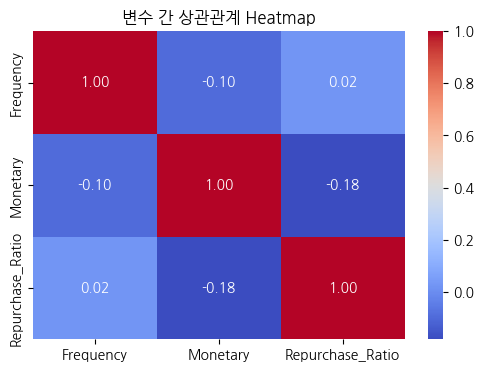


 주성분별 설명 분산 비율: [0.40550508 0.32730181 0.26719311]
 누적 설명 분산 비율: [0.40550508 0.73280689 1.        ]

 변수 간 상관성이 낮고, 설명 분산이 골고루 분포됨 → PCA 필수 아님 (원 변수로 클러스터링 가능)

 PCA Loading (주성분별 변수 기여도)
                    PC1    PC2    PC3
Frequency        -0.373  0.883  0.285
Monetary          0.690  0.059  0.721
Repurchase_Ratio -0.620 -0.466  0.632


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 분석 대상 변수 선택
features = ["Frequency", "Monetary", "Repurchase_Ratio"]
X = cat_new_rfm[features]

# 2. 상관관계 확인
print("\n 변수 간 상관계수")
print(X.corr())

plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("변수 간 상관관계 Heatmap")
plt.show()

# 3. PCA 수행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
cum_explained = explained_var.cumsum()

print("\n 주성분별 설명 분산 비율:", explained_var)
print(" 누적 설명 분산 비율:", cum_explained)

# 4. 판단 기준 제안
if any(abs(X.corr().values[np.triu_indices(len(features), k=1)]) > 0.8):
    print("\n 변수 간 높은 상관관계가 있음 → PCA 고려 권장")
elif cum_explained[0] > 0.9:
    print("\n 첫 번째 주성분이 90% 이상 설명 → 사실상 1차원 구조, PCA로 단순화 가능")
else:
    print("\n 변수 간 상관성이 낮고, 설명 분산이 골고루 분포됨 → PCA 필수 아님 (원 변수로 클러스터링 가능)")


# 5. 주성분 기여도(Loading) 확인
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(features))],
    index=features
)

print("\n PCA Loading (주성분별 변수 기여도)")
print(loadings.round(3))

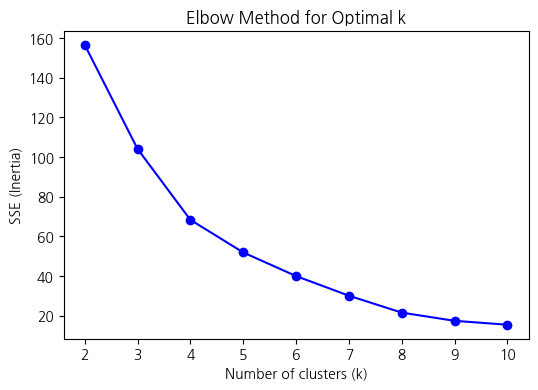

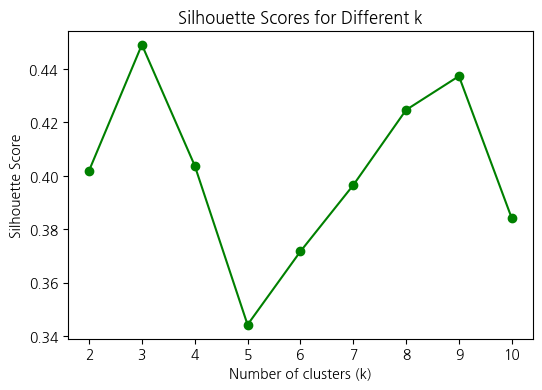

k=2, silhouette score=0.402
k=3, silhouette score=0.449
k=4, silhouette score=0.404
k=5, silhouette score=0.344
k=6, silhouette score=0.372
k=7, silhouette score=0.397
k=8, silhouette score=0.425
k=9, silhouette score=0.437
k=10, silhouette score=0.384


In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. 데이터 준비 & 스케일링
features = ["Frequency", "Monetary", "Repurchase_Ratio"]
X = cat_new_rfm[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Elbow 기법 (SSE)
sse = []
K_range = range(2, 11)  # K = 2 ~ 10까지 확인

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # 군집 내 제곱합

plt.figure(figsize=(6,4))
plt.plot(K_range, sse, 'o-', color='blue')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

# 3. 실루엣 계수
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, 'o-', color='green')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()

# 4. 결과 출력
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}, silhouette score={score:.3f}")


In [88]:
# 1. 데이터 준비 & 스케일링
features = ["Frequency", "Monetary", "Repurchase_Ratio"]
X = cat_new_rfm[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. KMeans (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cat_new_rfm["Cluster"] = kmeans.fit_predict(X_scaled)

# 3. 군집별 프로파일링
cluster_profile = cat_new_rfm.groupby("Cluster")[features].mean().round(2)
cluster_size = cat_new_rfm["Cluster"].value_counts().sort_index()

print(" Cluster Profile (평균값)")
print(cluster_profile)
print("\n Cluster Size (카테고리 수)")
cluster_size

 Cluster Profile (평균값)
         Frequency  Monetary  Repurchase_Ratio
Cluster                                       
0           437.53    118.21              0.03
1          5486.46    119.08              0.03
2           158.67    734.82              0.01

 Cluster Size (카테고리 수)


,count
Cluster,
0,55
1,13
2,3


## RFM 클러스터링

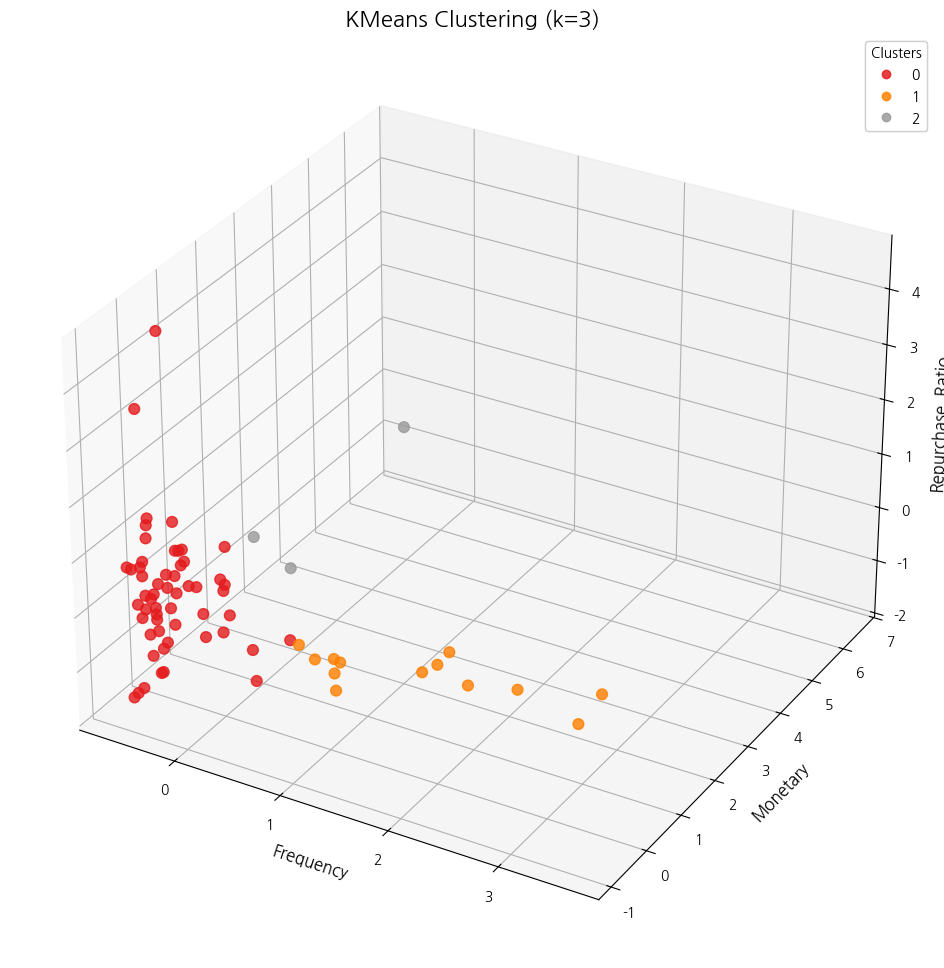

In [89]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 색상을 지정하여 산점도 그리기
scatter = ax.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    X_scaled[:, 2],
    c=cat_new_rfm["Cluster"],
    cmap="Set1",
    s=60,
    alpha=0.8
)

ax.set_title("KMeans Clustering (k=3)", fontsize=16)
ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Monetary", fontsize=12)
ax.set_zlabel("Repurchase_Ratio", fontsize=12)

# 범례 추가
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

### Cluster별 정의

In [90]:
# cluster_0 확인
cluster_0_df = cat_new_rfm[cat_new_rfm['Cluster'] == 0]
cluster_0_df[['product_category_name_english','Frequency', 'Monetary', 'Repurchase_Ratio']].sort_values(['Repurchase_Ratio','Frequency', 'Monetary'], ascending=False)

,product_category_name_english,Frequency,Monetary,Repurchase_Ratio
55,music,38,158.798684,0.105263
3,arts_and_craftmanship,23,75.583750,0.086957
24,drinks,287,59.639446,0.055749
28,fashion_bags_accessories,1820,75.228912,0.052778
67,tablets_printing_image,79,90.703735,0.050633
30,fashion_male_clothing,106,83.618640,0.047170
38,furniture_bedroom,90,184.968932,0.045455
44,home_appliances,747,104.552361,0.045134
46,home_comfort_2,24,25.342333,0.041667
48,home_construction,483,136.589883,0.041408


In [91]:
# cluster_1 확인
cluster_1_df = cat_new_rfm[cat_new_rfm['Cluster'] == 1]
cluster_1_df[['product_category_name_english','Frequency', 'Monetary', 'Repurchase_Ratio']].sort_values(['Repurchase_Ratio','Frequency', 'Monetary'], ascending=False)

,product_category_name_english,Frequency,Monetary,Repurchase_Ratio
7,bed_bath_table,9272,93.438762,0.041129
39,furniture_decor,6307,87.246040,0.040287
65,sports_leisure,7530,113.254958,0.032737
49,housewares,5743,90.600249,0.031206
15,computers_accessories,6530,116.264339,0.029041
43,health_beauty,8647,130.283330,0.026337
59,perfumery,3086,116.809775,0.025316
70,watches_gifts,5495,199.040276,0.024653
69,toys,3804,116.944536,0.024255
42,garden_tools,3448,110.237882,0.022925


In [92]:
# cluster_2 확인
cluster_2_df = cat_new_rfm[cat_new_rfm['Cluster'] == 2]
cluster_2_df[['product_category_name_english','Frequency', 'Monetary', 'Repurchase_Ratio']]

,product_category_name_english,Frequency,Monetary,Repurchase_Ratio
14,computers,177,1098.915276,0.016949
45,home_appliances_2,227,467.333117,0.022422
64,small_appliances_home_oven_and_coffee,72,638.213151,0.000000


## Cluster 0 에 대한 세분화

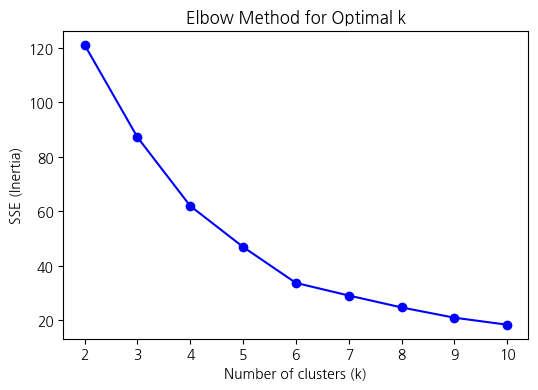

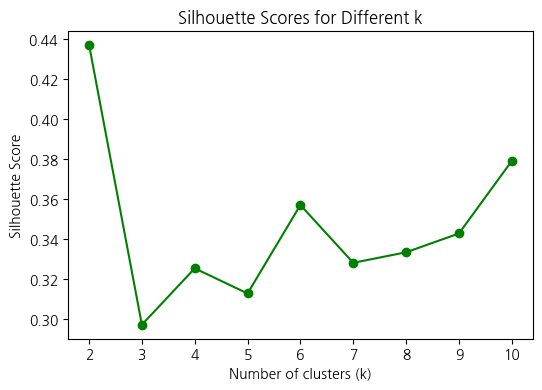

k=2, silhouette score=0.437
k=3, silhouette score=0.297
k=4, silhouette score=0.325
k=5, silhouette score=0.313
k=6, silhouette score=0.357
k=7, silhouette score=0.328
k=8, silhouette score=0.333
k=9, silhouette score=0.343
k=10, silhouette score=0.379


In [93]:
# 1. 데이터 준비 & 스케일링
features = ["Frequency", "Monetary", "Repurchase_Ratio"]
X = cluster_0_df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Elbow 기법 (SSE)
sse = []
K_range = range(2, 11)  # K = 2 ~ 10까지 확인

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # 군집 내 제곱합

plt.figure(figsize=(6,4))
plt.plot(K_range, sse, 'o-', color='blue')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

# 3. 실루엣 계수
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, 'o-', color='green')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()

# 4. 결과 출력
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}, silhouette score={score:.3f}")


- **cluster_0을 2개로 나누어 총 4개의 클러스터로 분할**

In [94]:
cluster_0_df_copy = cluster_0_df.copy()

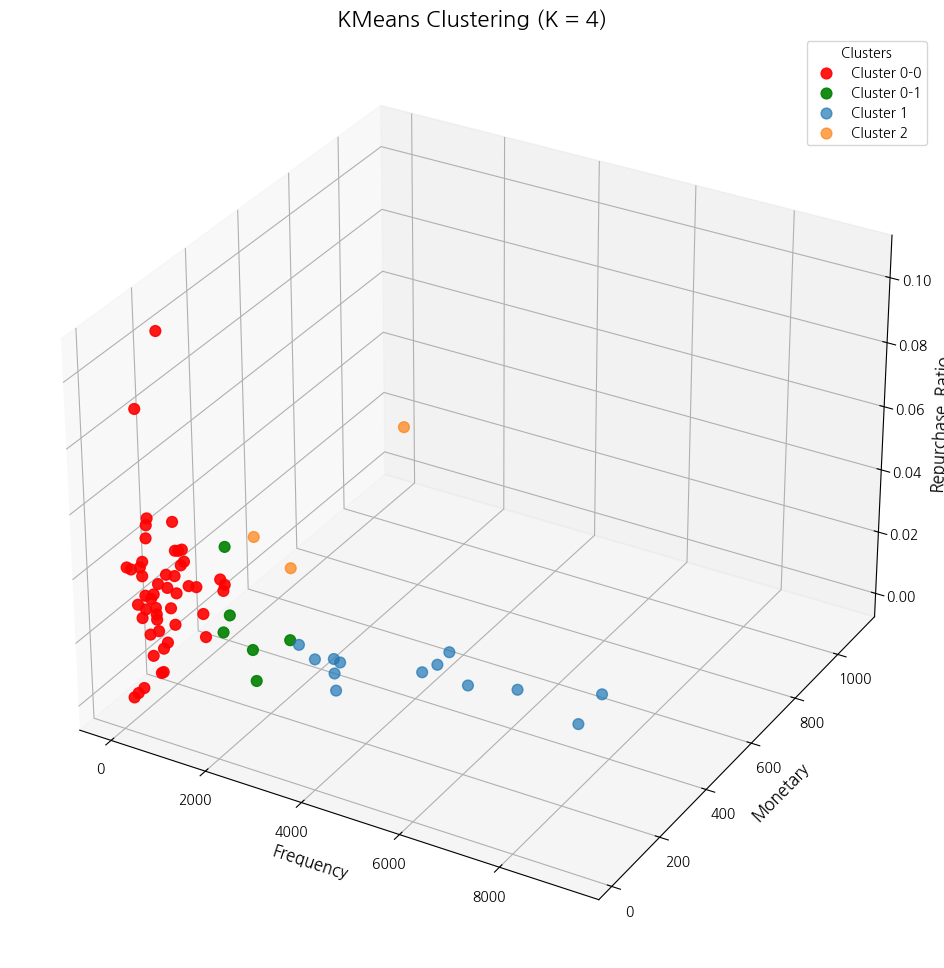

In [95]:
# 4개의 클러스터 시각화
kmeans_sub = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_0_df_copy["SubCluster"] = kmeans_sub.fit_predict(X_scaled)

cat_new_rfm.loc[cat_new_rfm["Cluster"] == 0, "SubCluster"] = cluster_0_df_copy["SubCluster"].values

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in [1, 2]:
    subset = cat_new_rfm[cat_new_rfm["Cluster"] == cluster_id]
    ax.scatter(
        subset["Frequency"], subset["Monetary"], subset["Repurchase_Ratio"],
        label=f"Cluster {cluster_id}", s=60, alpha=0.7
    )

colors = ["red", "green"]
for sub_id in [0, 1]:
    subset = cat_new_rfm[(cat_new_rfm["Cluster"] == 0) & (cat_new_rfm["SubCluster"] == sub_id)]
    ax.scatter(
        subset["Frequency"], subset["Monetary"], subset["Repurchase_Ratio"],
        label=f"Cluster 0-{sub_id}", s=60, alpha=0.9, color=colors[sub_id]
    )

ax.set_title("KMeans Clustering (K = 4)", fontsize=16)
ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Monetary", fontsize=12)
ax.set_zlabel("Repurchase_Ratio", fontsize=12)

handles, labels = ax.get_legend_handles_labels()  # 그래프의 핸들과 라벨 가져오기
order = [f'Cluster 0-{i}' for i in range(2)] + [f'Cluster {i}' for i in range(1, 3)]
sorted_legends = sorted(zip(handles, labels), key=lambda x: order.index(x[1]))
sorted_handles, sorted_labels = zip(*sorted_legends)
ax.legend(sorted_handles, sorted_labels, title="Clusters")
plt.show()

### k=2

In [96]:
# 1. 데이터 준비 & 스케일링
features = ["Frequency", "Monetary", "Repurchase_Ratio"]
cl0_X = cluster_0_df[features].copy()

scaler = StandardScaler()
cl0_X_scaled = scaler.fit_transform(cl0_X)

# 2. KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_0_df["Cluster"] = kmeans.fit_predict(cl0_X_scaled)

# 3. 군집별 프로파일링
cluster_profile = cluster_0_df.groupby("Cluster")[features].mean().round(2)
cluster_size = cluster_0_df["Cluster"].value_counts().sort_index()

print(" Cluster Profile (평균값)")
print(cluster_profile)
print("\n Cluster Size (카테고리 수)")
print(cluster_size)

 Cluster Profile (평균값)
         Frequency  Monetary  Repurchase_Ratio
Cluster                                       
0           239.02    119.87              0.03
1          2058.67    104.64              0.03

 Cluster Size (카테고리 수)
Cluster
0    49
1     6
Name: count, dtype: int64


/tmp/ipython-input-3359024806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0_df["Cluster"] = kmeans.fit_predict(cl0_X_scaled)


'final_cluster' 컬럼 생성 완료

 최종 클러스터 분포
final_cluster
0_0    49
1      13
0_1     6
2       3
Name: count, dtype: int64


/tmp/ipython-input-3835648815.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-3835648815.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-3835648815.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


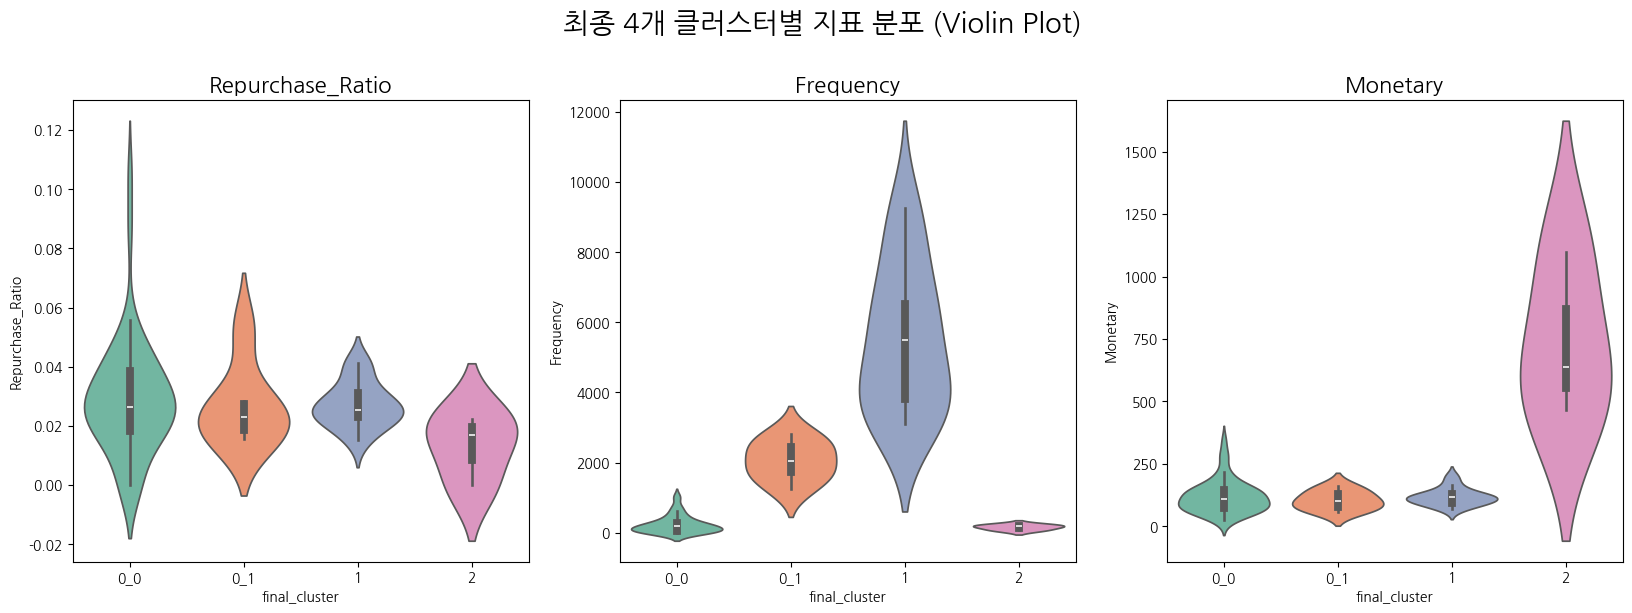

In [98]:
# 컬럼을 문자열 타입으로 초기화
cat_new_rfm['final_cluster'] = cat_new_rfm['Cluster'].astype(str)

# Cluster 0에 속한 데이터에 대해 SubCluster 값을 반영하여 라벨 변경
sub_cluster_0_mask = (cat_new_rfm['Cluster'] == 0) & (cat_new_rfm['SubCluster'] == 0)
sub_cluster_1_mask = (cat_new_rfm['Cluster'] == 0) & (cat_new_rfm['SubCluster'] == 1)

cat_new_rfm.loc[sub_cluster_0_mask, 'final_cluster'] = '0_0'
cat_new_rfm.loc[sub_cluster_1_mask, 'final_cluster'] = '0_1'

print("'final_cluster' 컬럼 생성 완료")
print("\n 최종 클러스터 분포")
print(cat_new_rfm['final_cluster'].value_counts())

# 4개 클러스터 바이올린 플롯 시각화
features = ["Repurchase_Ratio", "Frequency", "Monetary"]
# 그래프에 표시될 클러스터 순서 지정
cluster_order = ['0_0', '0_1', '1', '2']

plt.figure(figsize=(20, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(
        data=cat_new_rfm,
        x="final_cluster",
        y=feature,
        order=cluster_order,
        palette="Set2"
    )
    plt.title(f"{feature}", fontsize=16)

plt.suptitle("최종 4개 클러스터별 지표 분포 (Violin Plot)", fontsize=20, y=1.03)
plt.show()

/tmp/ipython-input-2453099789.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax, palette='rocket')
/tmp/ipython-input-2453099789.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax, palette='rocket')
/tmp/ipython-input-2453099789.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax, palette='rocket')
/tmp/ipython-input-2453099789.py:19: FutureWarning: 

Passing `palette` without assignin

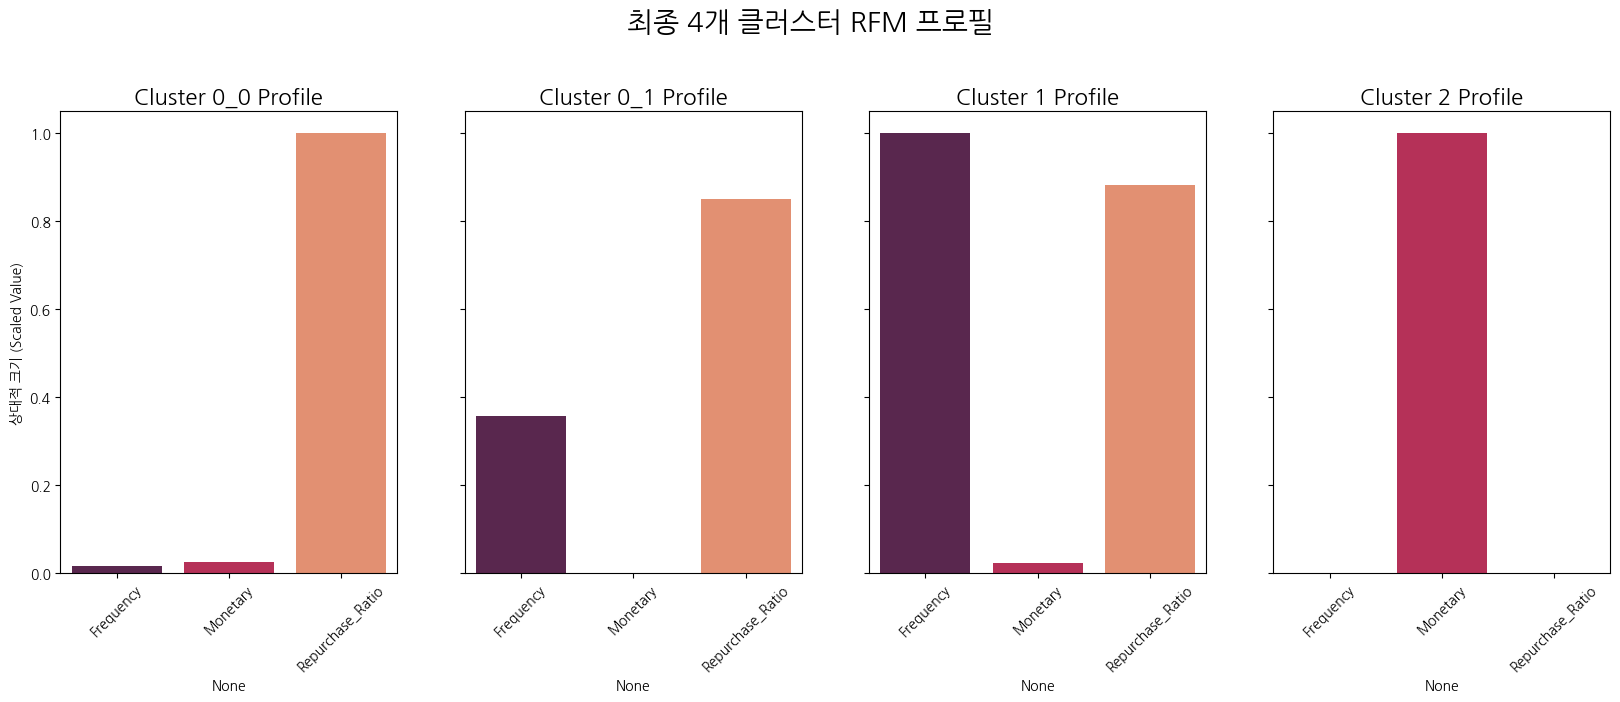

In [99]:
from sklearn.preprocessing import MinMaxScaler

cluster_summary = cat_new_rfm.groupby('final_cluster')[['Frequency', 'Monetary', 'Repurchase_Ratio']].mean()
# Min-Max 스케일링으로 0~1 사이 값으로 정규화
scaler = MinMaxScaler()
summary_scaled = pd.DataFrame(scaler.fit_transform(cluster_summary), columns=cluster_summary.columns, index=cluster_summary.index)

# 그래프 순서 지정
cluster_order = ['0_0', '0_1', '1', '2']
summary_scaled = summary_scaled.reindex(cluster_order)

# 시각화
n_clusters = len(summary_scaled)
fig, axes = plt.subplots(1, n_clusters, figsize=(n_clusters * 5, 6), sharey=True)

for i, cluster_name in enumerate(cluster_order):
    ax = axes[i]
    cluster_data = summary_scaled.loc[cluster_name]
    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax, palette='rocket')
    ax.set_title(f'Cluster {cluster_name} Profile', fontsize=16)
    ax.set_ylabel('상대적 크기 (Scaled Value)')
    ax.tick_params(axis='x', rotation=45)

fig.suptitle("최종 4개 클러스터 RFM 프로필", fontsize=20, y=1.05)
plt.show()

In [103]:
# 클러스터 별 카테고리의 개수
cat_new_rfm['final_cluster'].value_counts().sort_index()

,count
final_cluster,
0_0,49
0_1,6
1,13
2,3


# 결론

### 0. 데이터 불러오기


- 9개의 데이터 셋 중 필요한 데이터 셋만 선택
> orders, products, customers, order_items, category_name_translation

### 1. 전처리 및 피쳐 엔지니어링


- orders : 배송 완료(delivered)만 추출 / 구매일을 이용해서 첫 구매일 확인
- order_items : 상품 가격 + 배송비

### 2. 지표 생성 (Repurchase_Ratio, Frequency, Monetary)


- Repurchase_Ratio : 첫 구매일을 이용하여 같은 상품에 대한 재구매율 계산
- Frequency : 빈도수 계산 (New_Count + Repurchase_Count)
- Monetary : 상품 별 가격 평균 계산

### 3. 지표 간 상관관계 확인

- 지표 서로에 대한 상관관계가 낮고, 설명분포가 골고루 분포되어 PCA가 필수가 아님

### 4. K-means 클러스터링 및 최적의 K 찾기


- StandardScaler를 이용한 스케일링
- 엘보우 기법과 실루엣 계수를 이용한 최적의 K 찾음 (K=3)
- Cluster0의 경우 55개의 카테고리로 특징을 찾기 어려워 엘보우 기법과 실루엣 계수를 이용하여 2개로 재분할
- cluster0_0, cluster0_1, cluster1, cluster2로 총 4개의 카테고리 세분화 진행

### 5. 클러스터 특성 설명

#### 클러스터 0_0 (49개 카테고리)

- 그룹 특성 : 상품 수는 많지만 개별 상품 판매 빈도와 매출 기여도가 낮은 집단(Long-Tail Group)
> - 재구매율(R) 다양, 빈도(F) 낮음, 가격(M) 중간
> - 롱테일 키워드는 일반적으로 검색량이 적지만, 특정한 니즈를 가진 사용자에게 도달할 수 있는 기회를 제공

- 재고가 많진 않으나 카테고리 별 다양한 브랜드를 비치한다
> - 재고가 오래되면 자동으로 할인되는 프로모션으로 구매 유도
> - 다른 상품에 대한 연관검색어로 은은히 노출
> - **costruction** / fashion / home / flowers / food / dvds / book

#### 클러스터 0_1 (6개 카테고리)


- 그룹 특성 : 안정적인 매출원 카테고리
> - 재구매율(R) 중간, 빈도(F) 중간, 가격(M) 낮음

- 이탈을 방지하고 꾸준히 우리한테 구매하도록 방안
> - 주기적인 쿠폰 및 재구매 알림
> - electronics / office_furniture / stationery / baby / pet_shop / fashion_bags_accessories

#### 클러스터 1 (13개 카테고리)

- 그룹 특성 : 트래픽 유발 그룹
> - 재구매율(R) 중간, 빈도(F) 많음, 가격(M) 낮음

- 신규 고객을 끌어들이고 플랫폼을 활성화하는 "미끼 상품"
> - 객단가 기반 프로모션: "3만원 이상 구매 시 5천원 할인"과 같은 전략
> - 교차 판매(Cross-selling): 고객이 이 그룹의 상품을 장바구니에 담았을 때, "함께 구매하면 좋은 상품"으로 Cluster 0_1(핵심 상품)이나 Cluster 2(고가 상품)의 아이템을 적극적으로 추천
> - auto / bed_bath_table / computers_accessories / cool_stuff / furniture_decor / garden_tools / health_beauty / housewares / perfumery / sports_leisure / telephony / toys / watches_gifts

#### 클러스터 2 (3개 카테고리)

- 그룹 특성 : 고가 상품 그룹
> - 재구매율(R) 낮음, 빈도(F) 낮음, 가격(M) 높음

- 단발성 구매로 끝나지 않도록, 연관 상품의 동시 구매(번들링)를 유도
> - 묶음 구매 할인 : 2개 이상 구매 시 10% 할인, 3개 이상 구매 시 15% 할인"과 같이, 함께 구매하는 상품 수가 늘어날수록 할인율이 높아지는 전략
> - 할부 옵션 강조 : "12개월 무이자 할부 가능"과 같은 결제 옵션을 눈에 띄게 표시
> - computers / home_appliances_2 / small_appliances_home_oven_and_coffee